<a href="https://colab.research.google.com/github/JatinKrRana/AlmaBetter-Capstone_Projects/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Presentation Video:- https://drive.google.com/file/d/1yCQHSxVYA6Omtn1bTylMRI3MrqFOM6rp/view?usp=drive_link

# **Project Name**    -  Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**    - Jatin Kumar Rana


# **Project Summary -**

# **Bike Sharing Demand Prediction using Machine Learning**
## **Introduction**

The **Bike Sharing Demand Prediction** project aims to develop a machine learning regression model that accurately forecasts the demand for bike rentals in Seoul, South Korea. This project utilizes the SeoulBikeData dataset, which contains valuable information about bike rentals, weather conditions, and temporal factors. The goal is to build a robust predictive model that can assist bike rental services in efficiently managing their inventory and meeting customer demand.

## **Dataset Overview**

The SeoulBikeData dataset comprises data collected over a period of time, with features such as date, hour, temperature, humidity, wind speed, and more. These features are crucial in understanding the underlying patterns and factors influencing bike rental demand. The dataset will be preprocessed to handle missing values, outliers, and perform feature engineering to extract meaningful information.

## **Methodology**

### Data Preprocessing

The first step is to clean and prepare the data for model training. This involves handling missing values, encoding categorical variables, and scaling numerical features. Additionally, outliers will be identified and addressed to prevent them from adversely affecting model performance.

### Feature Engineering

Feature engineering plays a crucial role in improving the predictive power of the model. New features such as day of the week, time of day, and weather indicators will be created to capture temporal and environmental patterns.

### Model Selection and Training

Several regression algorithms, such as Linear Regression, Random Forest, and Gradient Boosting, will be considered for this project. Each model will be trained and evaluated using techniques like cross-validation to ensure robustness and avoid overfitting.

### Model Evaluation

The performance of the models will be assessed using appropriate evaluation metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) to gauge their accuracy in predicting bike rental demand.

## **Expected Outcomes**

Upon successful completion of this project, we anticipate achieving a reliable regression model that accurately predicts bike rental demand in Seoul. The insights gained from this model will empower bike rental services to make data-driven decisions about inventory management, pricing strategies, and resource allocation.

## **Impact and Future Work**

The implementation of an accurate demand prediction model has the potential to significantly benefit bike rental services. By optimizing resource allocation, they can reduce operational costs and improve customer satisfaction. Furthermore, this project lays the foundation for future enhancements, including real-time prediction capabilities and integration with additional data sources for a more comprehensive analysis.

In conclusion, the Bike Sharing Demand Prediction project aims to create a valuable tool for the bike rental industry in Seoul, enabling them to make informed decisions and enhance their services. Through careful data analysis, feature engineering, and model selection, we anticipate delivering a robust solution that contributes to the efficiency and success of bike rental businesses.

# **GitHub Link -**

https://github.com/JatinKrRana/AlmaBetter-Capstone_Project_1/blob/main/Bike_Sharing_Demand_Prediction.ipynb

# **Problem Statement**


The main objective of this project is to build a regression model that accurately predicts the number of bikes that will be rented on a given day and time in Seoul. This prediction will be based on features such as date, weather conditions, and other temporal factors. The model's performance will be evaluated based on metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared value.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

seoul_bike_df = pd.read_csv("/content/drive/MyDrive/Project_csv_Datasets/SeoulBikeData.csv", encoding='ISO-8859-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
seoul_bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
seoul_bike_df_rows = seoul_bike_df.shape[0]
seoul_bike_df_columns = seoul_bike_df.shape[1]

print(f"Number of rows in seoul_bike_df is {seoul_bike_df_rows} and columns is {seoul_bike_df_columns}.")

Number of rows in seoul_bike_df is 8760 and columns is 14.


### Dataset Information

In [ ]:
# Dataset Info
seoul_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
def duplicate_value_count(data):
  list1 = []
  duplicate_values = 0
  for i in data:
    if i in list1:
      duplicate_values += 1
    else:
      list1.append(i)
  return duplicate_values

In [ ]:
columns = [
    "Date",
    "Rented Bike Count",
    "Hour",
    "Temperature(°C)",
    "Humidity(%)",
    "Wind speed (m/s)",
    "Visibility (10m)",
    "Dew point temperature(°C)",
    "Solar Radiation (MJ/m2)",
    "Rainfall(mm)",
    "Snowfall (cm)",
    "Seasons",
    "Holiday",
    "Functioning Day"
]

for column in columns:
    print(f"Number of duplicate values in '{column}' column is {seoul_bike_df[column].duplicated().sum()}.")


Number of duplicate values in 'Date' column is 8395.
Number of duplicate values in 'Rented Bike Count' column is 6594.
Number of duplicate values in 'Hour' column is 8736.
Number of duplicate values in 'Temperature(°C)' column is 8214.
Number of duplicate values in 'Humidity(%)' column is 8670.
Number of duplicate values in 'Wind speed (m/s)' column is 8695.
Number of duplicate values in 'Visibility (10m)' column is 6971.
Number of duplicate values in 'Dew point temperature(°C)' column is 8204.
Number of duplicate values in 'Solar Radiation (MJ/m2)' column is 8415.
Number of duplicate values in 'Rainfall(mm)' column is 8699.
Number of duplicate values in 'Snowfall (cm)' column is 8709.
Number of duplicate values in 'Seasons' column is 8756.
Number of duplicate values in 'Holiday' column is 8758.
Number of duplicate values in 'Functioning Day' column is 8758.


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
null_value_count_1 = seoul_bike_df.isnull().sum().sum()
print(f"Number of null values in the seoul_bike dataframe is {null_value_count_1}.")

Number of null values in the seoul_bike dataframe is 0.


In [ ]:
bool_df_1 = seoul_bike_df.isnull()
column_name_list_1 = list(seoul_bike_df.columns)
null_value_list_1 = []

for i in column_name_list_1:
    null_value = (bool_df_1[i] == True).sum()
    null_value_list_1.append(null_value)

seoul_bike_null_value_count_df = pd.DataFrame({'Column Name': column_name_list_1, 'Null Value Count': null_value_list_1})
print(seoul_bike_null_value_count_df)

                  Column Name  Null Value Count
0                        Date                 0
1           Rented Bike Count                 0
2                        Hour                 0
3             Temperature(°C)                 0
4                 Humidity(%)                 0
5            Wind speed (m/s)                 0
6            Visibility (10m)                 0
7   Dew point temperature(°C)                 0
8     Solar Radiation (MJ/m2)                 0
9                Rainfall(mm)                 0
10              Snowfall (cm)                 0
11                    Seasons                 0
12                    Holiday                 0
13            Functioning Day                 0


### What did you know about your dataset?

1. **General Information:**

* The dataset has 8,760 rows and 14 columns.
The columns represent various attributes of the data.

2. **Column Information:**

* The columns have a mix of data types, including int64, float64, and object.
* The 'Date' column is of type object, which usually indicates that it might need to be converted to a datetime format for date-related operations.

3. **Duplicate Values:**

* Many columns seem to have a significant number of duplicate values. This suggests that there may be repeated data points or measurements.

4. **Null Values:**

* There are no null values in the dataset, which means all cells in the dataset have some value.

5. **Column Specifics:**

* 'Hour', 'Humidity(%)', 'Visibility (10m)', 'Rainfall(mm)', and 'Snowfall (cm)' are likely discrete variables, as they have integer values.
* 'Temperature(°C)', 'Wind speed (m/s)', 'Dew point temperature(°C)', and 'Solar Radiation (MJ/m2)' are likely continuous variables, as they have floating-point values.
* 'Seasons', 'Holiday', and 'Functioning Day' are categorical variables, as they have string (object) values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
pd.DataFrame(seoul_bike_df.columns,columns = ['Variables of Seoul Bike DataFrame'])

Variables of Seoul Bike DataFrame
0                               Date
1                  Rented Bike Count
2                               Hour
3                    Temperature(°C)
4                        Humidity(%)
5                   Wind speed (m/s)
6                   Visibility (10m)
7          Dew point temperature(°C)
8            Solar Radiation (MJ/m2)
9                       Rainfall(mm)
10                     Snowfall (cm)
11                           Seasons
12                           Holiday
13                   Functioning Day

In [ ]:
# Dataset Describe
seoul_bike_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

1. **Date:** This column contains the date on which the data was recorded. It is a temporal variable that provides a timeline for the bike rental data.

2. **Rented Bike Count:** This column records the number of bikes that were rented at a specific date and time. It is a numerical variable indicating the demand for bikes.

3. **Hour:** This column represents the specific hour of the day when the bike rental data was recorded. It is a temporal variable that further refines the time of rental.

4. **Temperature (°C):** This column provides the temperature in degrees Celsius at the time of recording. It is a numerical variable indicating the weather condition.

5. **Humidity (%):** This column indicates the relative humidity at the time of recording, expressed as a percentage. It provides information about the moisture content in the air.

6. **Wind Speed (m/s):** This column records the wind speed in meters per second at the time of recording. It is a numerical variable indicating the strength of the wind.

7. **Visibility (10m):** This column represents the visibility in meters. It indicates how far one can clearly see in the prevailing weather conditions.

8. **Dew Point Temperature (°C):** This column provides the dew point temperature in degrees Celsius. It is a measure of atmospheric moisture and can influence human comfort.

9. **Solar Radiation (MJ/m2):** This column likely contains data on solar radiation measured in mega joules per square meter. It indicates the amount of solar energy received at the location.

10. **Rainfall (mm):** This column records the amount of rainfall in millimeters at the time of recording. It provides information about precipitation.

11. **Snowfall (cm):** This column records the amount of snowfall in centimeters at the time of recording. It provides information about snow accumulation.

12. **Seasons:** This column likely categorizes the season at the time of recording (e.g., Spring, Summer, Fall, Winter). It is a categorical variable indicating the time of year.

13. **Holiday:** This column likely indicates whether the recorded date was a holiday or not. It is a binary variable (Yes/No) indicating the holiday status.

14. **Functioning Day:** This column likely indicates whether the day was a functioning (working) day or not. It is a binary variable (Yes/No) indicating the operational status of the day, which might be relevant for bike rentals.

### Check Unique Values for each variable.

In [ ]:
seoul_bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
# Check Unique Values for each variable.
variable_list = list(seoul_bike_df.columns)

def check_unique_values(variable):
  unique_values = seoul_bike_df[variable].unique()
  return unique_values

In [ ]:
pd.DataFrame(check_unique_values(variable_list[11]),columns = ['Unique Seasons'])

Unique Seasons
0         Winter
1         Spring
2         Summer
3         Autumn

In [ ]:
pd.DataFrame(check_unique_values(variable_list[12]),columns = ['Unique Holyday'])

Unique Holyday
0     No Holiday
1        Holiday

In [ ]:
pd.DataFrame(check_unique_values(variable_list[13]),columns = ['Unique Functioning Day'])

Unique Functioning Day
0                    Yes
1                     No

## 3. ***Data Wrangling***

### **Data Cleaning**

**1. Converting Date Column:**

In [ ]:
# Converting 'Date' columns to datetime data type
seoul_bike_df['Date'] = pd.to_datetime(seoul_bike_df['Date'])

# Extracting day and month from the date column and making new column each
seoul_bike_df['Day Name'] = seoul_bike_df['Date'].dt.day_name()
seoul_bike_df['Month'] = seoul_bike_df['Date'].dt.month

**2. Separating the dataset into numerical and categorical dataset:**

In [ ]:
# Initializing empty lists for numerical and categorical columns
numerical_columns = []
categorical_columns = []

# Iterating through columns
for column in seoul_bike_df.columns:
    if column != 'Date':  # Exclude 'Date' column
        if seoul_bike_df[column].dtype == 'int64' or seoul_bike_df[column].dtype == 'float64':
            numerical_columns.append(column)
        else:
            categorical_columns.append(column)

# Creating separate datasets
numerical_data = seoul_bike_df[numerical_columns]
categorical_data = seoul_bike_df[categorical_columns]


### **Data Analysis**

**1. Descriptive Statistics:**

In [ ]:
# Calculate summary statistics
summary_stats = seoul_bike_df.describe()
summary_stats

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)        Month  
count              8760.000000   8760.000000    8760.000000  8760.000000  
mean                  0.569111      0.148687       0.075068     6.526027  
std                   0.868746      1.128193       0.436746     3.448048  
min                   0.000000      0.000000       0.000000     1.000000  
25%                   0.000000      0.000000       0.000000     4.000000  
50%                   0.010000      0.000000       0.000000     7.000000  
75%                   0.930000      0.000000       0.000000    10.000000  
max                   3.520000     35.000000       8.800000    12.000000

**2. Time Series Analysis:**

In [ ]:
# Calculate the Rented Bike Count Over Time
seoul_bike_df.set_index('Date', inplace=True)
daily_rented_count = seoul_bike_df['Rented Bike Count'].resample('D').sum()
daily_rented_count

Date
2017-01-12     9539
2017-01-13        0
2017-01-14        0
2017-01-15        0
2017-01-16        0
              ...  
2018-12-07    29428
2018-12-08    17498
2018-12-09    31809
2018-12-10    26237
2018-12-11    21003
Freq: D, Name: Rented Bike Count, Length: 699, dtype: int64

**3. Hourly Distribution:**

In [ ]:
# Calculating the average rented bike count for each hour
hourly_rented_count = seoul_bike_df.groupby('Hour')['Rented Bike Count'].mean()
hourly_rented_count

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

**4. Seasonal Analysis:**

In [ ]:
# Calculating the total rented bike count for each season
seasonal_rented_count = seoul_bike_df.groupby('Seasons')['Rented Bike Count'].sum()
seasonal_rented_count

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

**5. Holiday vs. Non-Holiday Analysis:**

In [ ]:
# Grouping the data by 'Holiday' and calculating the total rented bike count for each category
holiday_rented_count = seoul_bike_df.groupby('Holiday')['Rented Bike Count'].sum()
holiday_rented_count

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

**6.  Functioning Day Analysis:**

In [ ]:
# Group the data by 'Functioning Day' and calculate the total rented bike count for each category
functioning_day_rented_count = seoul_bike_df.groupby('Functioning Day')['Rented Bike Count'].sum()
functioning_day_rented_count

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

**7. Correlation Analysis:**

In [ ]:
# Calculate the correlation matrix
correlation_matrix = seoul_bike_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                           Rented Bike Count          Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  4.102573e-01         0.538558   
Hour                                0.410257  1.000000e+00         0.124114   
Temperature(°C)                     0.538558  1.241145e-01         1.000000   
Humidity(%)                        -0.199780 -2.416438e-01         0.159371   
Wind speed (m/s)                    0.121108  2.851967e-01        -0.036252   
Visibility (10m)                    0.199280  9.875348e-02         0.034794   
Dew point temperature(°C)           0.379788  3.054372e-03         0.912798   
Solar Radiation (MJ/m2)             0.261837  1.451309e-01         0.353505   
Rainfall(mm)                       -0.123074  8.714642e-03         0.050282   
Snowfall (cm)                      -0.141804 -2.151645e-02        -0.218405   
Month                               0.070861  1.036729e-15         0.049683   

                           Humidity(%)  Wind speed 

### What all manipulations have you done and insights you found?

Here are all manipulations I've done and insights I found:-

1. **Descriptive Statistics:**

* The dataset contains 8,760 data points.
* The "Rented Bike Count" variable has a mean of 704.60 bikes, with a minimum of 0 bikes and a maximum of 3,556 bikes.
* The "Hour" variable has values ranging from 0 to 23.
* Other variables, including temperature, humidity, wind speed, visibility, dew point temperature, solar radiation, rainfall, and snowfall, also have descriptive statistics.

2. **Time Series Analysis:**

* The time series data shows the "Rented Bike Count" over a period of time from 2017-01-12 to 2018-12-11.

3. **Hourly Distribution:**

* The hourly distribution of "Rented Bike Count" shows variations in bike rentals throughout the day, with a peak around 18:00 (6:00 PM) and a trough around 3:00 (3:00 AM).

4. **Seasonal Analysis:**

* The dataset is categorized into four seasons: Autumn, Spring, Summer, and Winter.
* The highest total bike rentals are in Summer, while Winter has the lowest total bike rentals.

5. **Holiday vs. Non-Holiday Analysis:**

* The data is categorized into "Holiday" and "No Holiday" periods.
* There are significantly more bike rentals on "No Holiday" days compared to "Holiday" days.

6. **Functioning Day Analysis:**

* The data is categorized into "No" and "Yes" for functioning days.
* There are many more bike rentals on "Yes" (functioning) days than on "No" days.

7. **Correlation Analysis:**

* The correlation matrix shows the relationships between variables.
* "Rented Bike Count" is positively correlated with temperature, dew point temperature, and solar radiation.
* It is negatively correlated with humidity, wind speed, and rainfall.
* Some variables, like visibility and snowfall, have weaker correlations with bike rentals.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1   Rented Bike Count Over Time

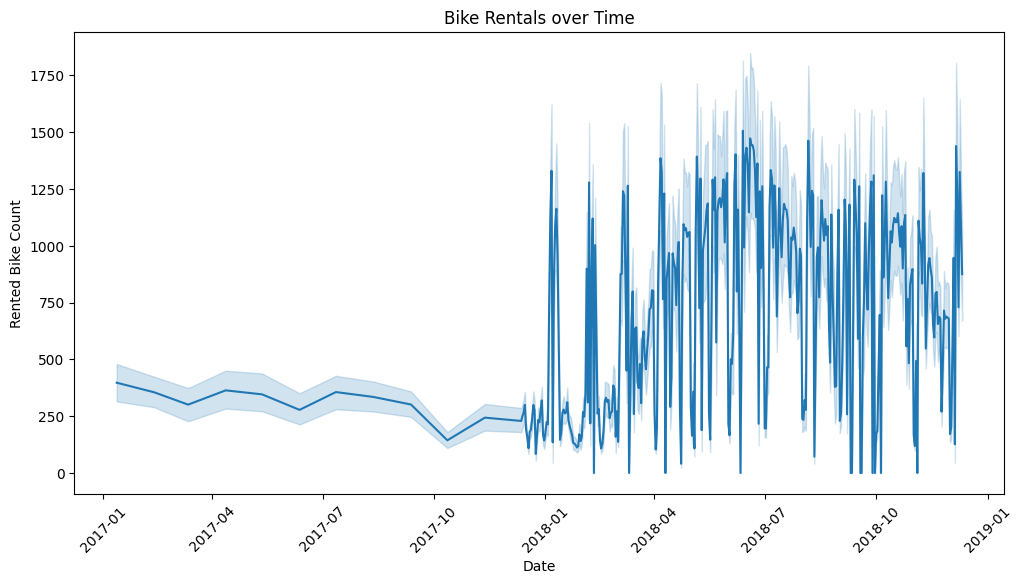

In [ ]:
# Line plot of Bike Rentals over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Rented Bike Count', data=seoul_bike_df)
plt.title('Bike Rentals over Time')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?


A line plot was chosen because it's ideal for visualizing trends over time. It's especially effective for continuous data like bike rentals. Line plots make it easy to interpret how the variable changes continuously, making it a suitable choice for displaying bike rental trends over dates.

##### 2. What is/are the insight(s) found from the chart?

Insights:-

In 2017, the rented bike count remained relatively stable and consistent, fluctuating between approximately 100 and 500 bikes throughout the year. This suggests a consistent level of demand during that period.

In 2018, there is more variability in rented bike counts. The values range from 0 to 1750, indicating a wider range of demand. This suggests that there were periods of very low demand (possibly off-peak hours or days) as well as times of high demand.

The change in distribution from a narrow range in 2017 to a wider range in 2018 indicates a potential shift in bike usage patterns. This could be due to various factors, such as increased popularity, changes in operating hours, or shifts in user behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. Understanding the usage patterns over time allows the business to allocate resources more effectively. For example, they can deploy more bikes during peak hours and reduce resources during off-peak times, potentially leading to cost savings and improved customer satisfaction.

2. Knowing when and where demand is highest allows for more targeted marketing efforts. For example, promotions and advertisements can be tailored to times of higher demand to attract more users.

3. Recognizing seasonal variations can help the business prepare for surges in demand (e.g., during summer months) by ensuring there are enough bikes available. This can lead to higher customer satisfaction and retention.

Potential Negative Impact:

1. The wider range of bike rentals in 2018 suggests more variability in demand, which can be challenging to manage. Allocating resources optimally during periods of high and low demand might be more complex, potentially leading to operational inefficiencies.

2. With higher usage and potential seasonal variations, there might be increased wear and tear on the bikes. This could result in higher maintenance and repair costs for the business.

3. Overestimation or Underestimation of Demand: If the business misjudges the level of demand during specific periods, it could lead to either a surplus of bikes (which may not be profitable) or a shortage (resulting in customer dissatisfaction).

#### Chart - 2   Average Rented Bike Count by Hour

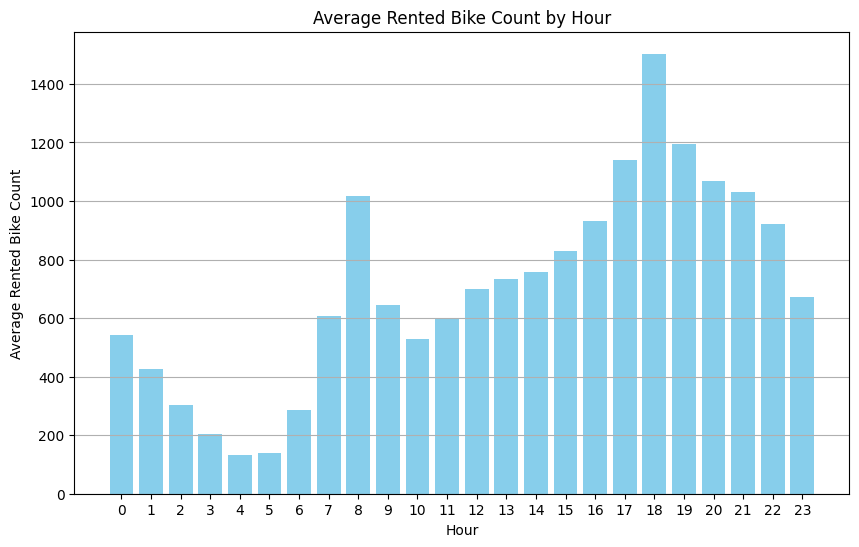

In [ ]:
# Plot the distribution of rented bike counts by hour
plt.figure(figsize=(10, 6))
plt.bar(hourly_rented_count.index, hourly_rented_count, color='skyblue')
plt.title('Average Rented Bike Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')
plt.xticks(hourly_rented_count.index)
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot was chosen to compare the average rented bike count across different hours. It's effective for visualizing discrete data and allows for easy comparison between categories. The height of each bar directly represents the value it represents, making it straightforward for viewers to understand. This type of plot is suitable for frequency distributions, which is applicable in this case.

##### 2. What is/are the insight(s) found from the chart?

**Insights:-**

**Peak Hours of Demand:**

Hours 8 (8:00 AM) and 17 (5:00 PM) have the highest average rented bike counts. This suggests that these are peak hours when people are likely using bikes for commuting or other purposes.

**Early Morning and Late Night Usage:**

Hours 3 (3:00 AM) and 4 (4:00 AM) have significantly lower average bike counts. This indicates low demand during these early morning hours, which is expected.

**Evening and Night Usage:**

Hours 18 (6:00 PM) to 23 (11:00 PM) still have relatively high bike counts. This suggests that people are using bikes for leisure or other activities during the evening and night.

**Midday Usage:**

Hours 11 (11:00 AM) to 15 (3:00 PM) also show relatively high average bike counts. This could indicate usage during lunch breaks or for short trips during midday.

**Afternoon Usage:**

Hours 16 (4:00 PM) and 17 (5:00 PM) also show strong demand, potentially indicating people using bikes for afternoon activities or commuting back home.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. **Optimized Resource Allocation:** Knowing the peak hours of demand (8 AM and 5 PM) allows the business to allocate more bikes and staff during those times, ensuring they meet customer needs efficiently.

2. **Enhanced Customer Experience:** By having enough bikes available during high-demand hours, the business can reduce wait times and improve the overall customer experience, potentially leading to higher customer satisfaction and retention.

3. **Marketing Campaign Optimization:** The insights can be used to target marketing efforts more effectively. For instance, the business can run promotions or advertisements during times of lower demand to encourage usage.

4. **Service Expansion Planning:** Recognizing the demand patterns helps in planning for service expansion. For instance, if there's a consistently high demand during off-peak hours, the business might consider extending operating hours.

Potential Negative Impact:

1. **Maintenance and Repair Challenges:** With high usage during peak hours, there might be more wear and tear on the bikes. This could lead to increased maintenance and repair costs, potentially impacting profitability.

2. **Overestimation or Underestimation of Demand:** If the business overestimates or underestimates demand during specific periods, it could lead to either a surplus of bikes (which may not be profitable) or a shortage (resulting in customer dissatisfaction).

3. **Weather Dependency:** If demand is highly correlated with specific weather conditions (e.g., sunny days), the business may be vulnerable to unexpected weather changes, potentially impacting profitability.

Overall, while the insights provide valuable information for optimizing operations and improving customer experience, there are potential challenges such as maintenance costs and weather-dependent demand fluctuations that need to be managed. It's crucial for the business to use these insights strategically and adapt their strategies to mitigate potential negative impacts and maximize positive outcomes.







#### Chart - 3 Total Rented Bike Count by Season

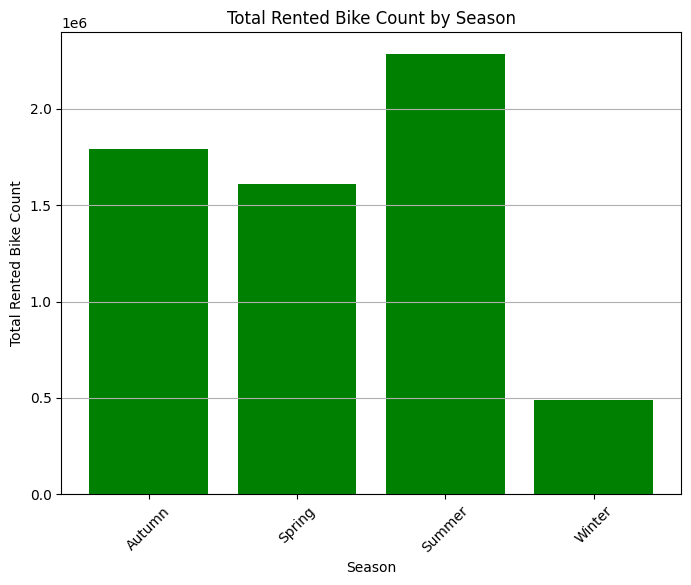

In [ ]:
# Create a bar chart to visualize bike rentals by season
plt.figure(figsize=(8, 6))
plt.bar(seasonal_rented_count.index, seasonal_rented_count, color='green')
plt.title('Total Rented Bike Count by Season')
plt.xlabel('Season')
plt.ylabel('Total Rented Bike Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot was chosen to compare the total rented bike count across different seasons. It's effective for visualizing discrete data and allows for easy comparison between categories. The height of each bar directly represents the value it represents, making it straightforward for viewers to understand. This type of plot is suitable for frequency distributions, which is applicable in this case.

##### 2. What is/are the insight(s) found from the chart?

Insights:-

1. Summer has the highest total rented bike count, indicating it's the peak season for bike rentals. This could be due to favorable weather conditions and more outdoor activities.


2. Autumn follows closely behind Summer in terms of bike rentals, suggesting that the demand for bikes remains relatively high as the weather transitions into cooler temperatures.


3. Spring also has a substantial total rented bike count, indicating that it's a popular season for bike rentals. The mild weather in Spring likely encourages outdoor activities.
Winter has the Lowest Demand:

4. Winter shows the lowest total rented bike count. This is expected, as colder weather and potential adverse conditions may discourage bike usage during this season

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. **Optimized Resource Allocation:** Understanding seasonal variations allows the business to allocate resources more efficiently. For example, during peak seasons like Summer and Autumn, they can deploy more bikes and staff to meet higher demand.

2. **Marketing Campaign Optimization:** Tailoring marketing efforts to different seasons can lead to higher customer acquisition and retention rates. For instance, running promotions during the high-demand seasons can attract more users.

3. **Improved Customer Experience:** Having enough bikes available during peak seasons can reduce wait times and enhance the overall customer experience, potentially leading to higher customer satisfaction and retention.

4. **Seasonal Pricing Strategies:** The insights can inform seasonal pricing adjustments. For example, the business may consider offering discounts during off-peak seasons to stimulate demand.

Potential Negative Impact:

1. **Resource Overallocation or Underallocation:** If the business misjudges the level of demand during specific seasons, it could lead to either a surplus of bikes (which may not be profitable) or a shortage (resulting in customer dissatisfaction).

2. **Weather Dependency:** If demand is highly correlated with specific weather conditions (e.g., low demand in Winter due to cold weather), the business may be vulnerable to unexpected weather changes, potentially impacting profitability.

3. **Maintenance and Storage Challenges:** During high-demand seasons, there may be more wear and tear on the bikes, leading to increased maintenance and repair costs. Additionally, finding adequate storage space for additional bikes during peak seasons may be a challenge.

4. **Potential for Seasonal Staffing Fluctuations:** To match seasonal demand, the business may need to hire additional staff during peak seasons. However, this may lead to challenges in staff scheduling and management.

Overall, while the insights provide valuable information for optimizing operations and marketing strategies, there are potential challenges such as maintenance costs, weather-dependent demand fluctuations, and resource allocation that need to be managed. It's crucial for the business to use these insights strategically and adapt their strategies to mitigate potential negative impacts and maximize positive outcomes.







#### Chart - 4 Total Rented Bike Count on Holidays vs. Regular Days

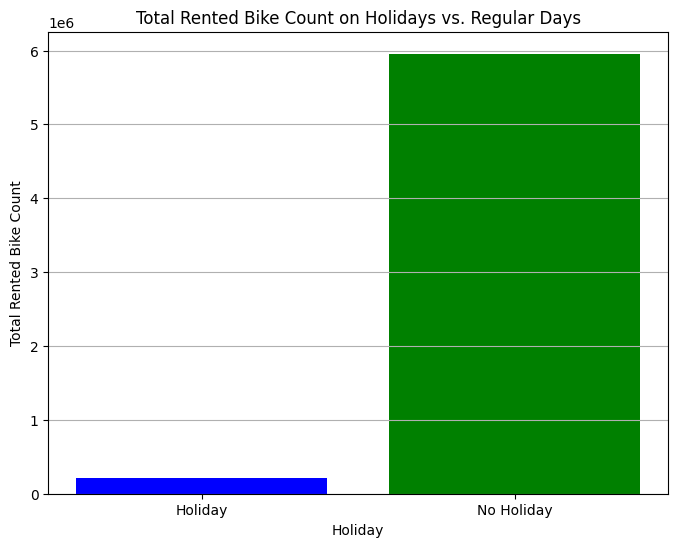

In [ ]:
# Create a bar chart to visualize bike rentals on holidays vs. regular days
plt.figure(figsize=(8, 6))
plt.bar(holiday_rented_count.index, holiday_rented_count, color=['blue', 'green'])
plt.title('Total Rented Bike Count on Holidays vs. Regular Days')
plt.xlabel('Holiday')
plt.ylabel('Total Rented Bike Count')
plt.xticks([0, 1], ['Holiday','No Holiday'])
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar plot was chosen to compare bike rentals on regular days versus holidays. This type of plot is effective for visually comparing two categories side by side. It's suitable for categorical data and allows for easy interpretation and clear differentiation between the two groups. Given that we're comparing only two categories (regular days and holidays), a grouped bar plot is a straightforward and effective choice.

##### 2. What is/are the insight(s) found from the chart?

Insights:-

1. The total rented bike count on non-holidays ("No Holiday") is significantly higher compared to holidays. This indicates that people tend to use rented bikes more on regular, non-holiday days.


2. The data suggests that holidays may not significantly impact bike rental demand. This could indicate that factors like weather, day of the week, or other seasonal patterns might have a stronger influence on bike rental behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. **Optimized Resource Allocation:** The insight that bike rentals are significantly higher on non-holiday days suggests that allocating more resources (such as bikes and staff) on regular days can help meet the increased demand. This can lead to improved customer satisfaction and potentially higher profits.

2. **Tailored Marketing Strategies:** Recognizing the difference in rental patterns between holidays and regular days allows for the implementation of tailored marketing strategies. Special promotions or events can be organized on holidays to boost rentals, while focused efforts on regular days can maximize profitability.

Potential Negative Impact:

1. **Potential for Overallocation on Holidays:** If the business misjudges the level of demand on holidays and allocates too many resources, it could lead to a surplus of bikes and staff, which may not be profitable and could result in unnecessary costs.

2. **Weather Dependency:** If bike rental demand is highly dependent on weather conditions, particularly on holidays, the business may be vulnerable to unexpected weather changes. Poor weather on holidays could lead to lower rentals and potentially impact profitability.

Overall, while the gained insights offer valuable opportunities for optimizing operations and marketing strategies, there are potential challenges such as overallocation on holidays and weather-dependent demand fluctuations that need to be carefully managed. The business should use these insights strategically and adapt their strategies to mitigate potential negative impacts and maximize positive outcomes.







#### Chart - 5 The relationship between weather features and rented bike count

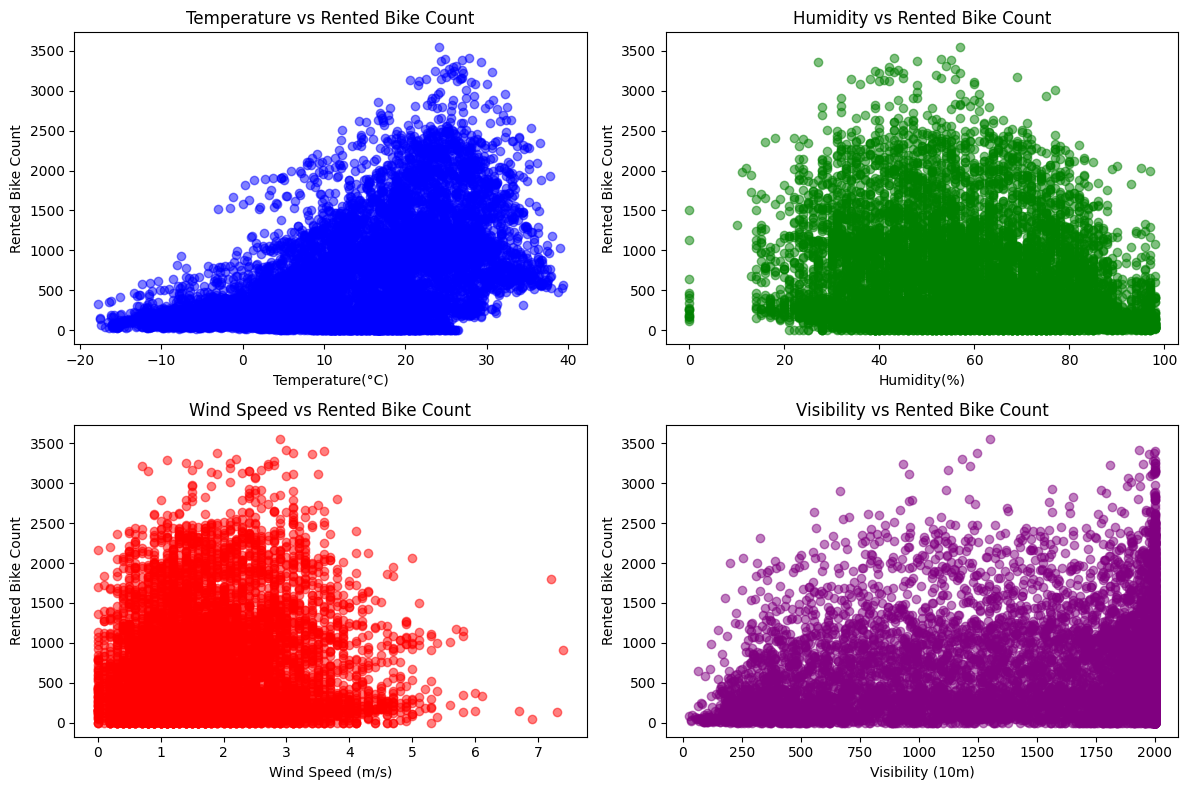

In [ ]:
# Create scatter plots to visualize the relationship between weather features and rented bike count
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(seoul_bike_df['Temperature(°C)'], seoul_bike_df['Rented Bike Count'], color='blue', alpha=0.5)
plt.title('Temperature vs Rented Bike Count')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')

plt.subplot(2, 2, 2)
plt.scatter(seoul_bike_df['Humidity(%)'], seoul_bike_df['Rented Bike Count'], color='green', alpha=0.5)
plt.title('Humidity vs Rented Bike Count')
plt.xlabel('Humidity(%)')
plt.ylabel('Rented Bike Count')

plt.subplot(2, 2, 3)
plt.scatter(seoul_bike_df['Wind speed (m/s)'], seoul_bike_df['Rented Bike Count'], color='red', alpha=0.5)
plt.title('Wind Speed vs Rented Bike Count')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Rented Bike Count')

plt.subplot(2, 2, 4)
plt.scatter(seoul_bike_df['Visibility (10m)'], seoul_bike_df['Rented Bike Count'], color='purple', alpha=0.5)
plt.title('Visibility vs Rented Bike Count')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?


Scatter plots were chosen to visualize the relationship between weather features (temperature, humidity, wind speed, visibility) and rented bike count. They are ideal for examining associations between continuous variables, allowing for the identification of patterns, outliers, and trends in the data. This type of plot is well-suited for exploring how weather conditions may influence bike rentals.

##### 2. What is/are the insight(s) found from the chart?

**Insights:-**

1. In the first chart, a left-skewed distribution indicates that on days with higher temperatures, there tends to be a higher concentration of rented bikes. This suggests that warmer weather may lead to increased bike rentals.

2. The second chart, displaying a normal distribution, suggests that there may not be a strong linear relationship between humidity and rented bike count. Bike rentals appear to be relatively evenly distributed across different humidity levels.

3. In the third chart, a right-skewed distribution indicates that on days with lower wind speeds, there is a higher concentration of rented bikes. This suggests that calmer wind conditions may be more favorable for bike rentals.

4. The fourth chart, showing a left-skewed distribution, suggests that days with higher visibility tend to have a higher concentration of rented bikes. This implies that clearer visibility may be associated with increased bike rentals.

**Overall Insights:**

Weather conditions such as temperature, wind speed, and visibility seem to have noticeable impacts on bike rental counts.

Humidity, while important for comfort, may not have a significant linear correlation with bike rentals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. **Optimized Operations Based on Weather:** Understanding the impact of weather conditions on bike rentals allows the business to optimize operations. They can adjust bike deployment, staff scheduling, and maintenance efforts based on forecasted weather conditions. For example, on days with clear visibility and favorable temperatures, they can allocate more resources.

2. **Tailored Marketing and Promotions:** The insights can guide marketing efforts. For instance, the business can run promotions or advertisements during days with ideal weather conditions to attract more users. This targeted approach can lead to increased rentals and potentially higher profits.

Potential Negative Impact:

1. **Dependency on Weather Conditions:** The business is highly dependent on weather conditions for demand. Unpredictable or adverse weather could lead to fluctuations in rental counts. For example, sudden rain or storms could lead to a significant drop in bike rentals.

2. **Risk of Over-Optimization:** Relying heavily on weather data for resource allocation and marketing may lead to over-optimization. If forecasts are inaccurate or if the business becomes too reactive to short-term weather changes, it could result in inefficient resource allocation and unnecessary costs.

3. **Impact on Maintenance Costs:** Adjusting resources based on weather conditions may lead to varying levels of wear and tear on the bikes. For example, bikes might see more wear during periods of high demand in favorable weather. This could increase maintenance and repair costs.

Overall, while the gained insights offer opportunities for optimizing operations and marketing strategies, there are potential risks associated with the dependency on weather conditions and the need for careful resource allocation. The business should use these insights judiciously, considering long-term trends and potential seasonal adjustments, to mitigate potential negative impacts and maximize positive outcomes.







#### Chart - 6 Total Rented Bike Count on Functioning vs. Non-Functioning Days

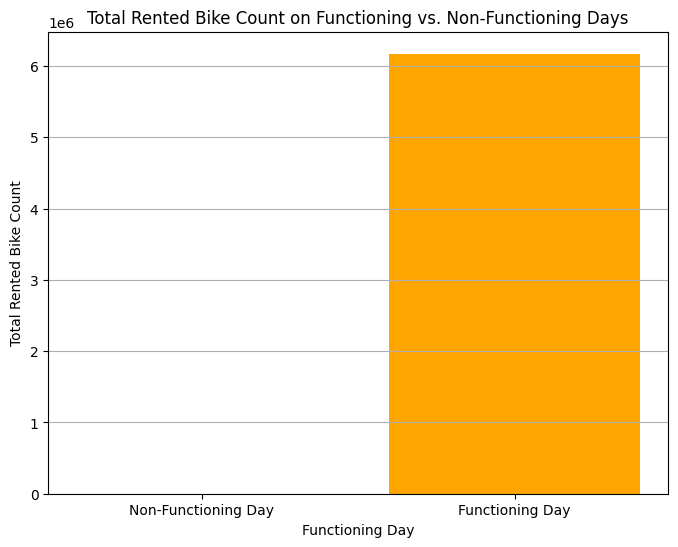

In [ ]:
# Create a bar chart to visualize bike rentals on functioning vs. non-functioning days
plt.figure(figsize=(8, 6))
plt.bar(functioning_day_rented_count.index, functioning_day_rented_count, color=['purple', 'orange'])
plt.title('Total Rented Bike Count on Functioning vs. Non-Functioning Days')
plt.xlabel('Functioning Day')
plt.ylabel('Total Rented Bike Count')
plt.xticks([0, 1], ['Non-Functioning Day', 'Functioning Day'])
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen for comparing bike rentals on functioning and non-functioning days due to its suitability for visualizing categorical data. It provides a clear and easy-to-interpret representation of the total rented bike count in each category. Given that there are only two distinct categories to compare, a bar chart effectively highlights the differences.

##### 2. What is/are the insight(s) found from the chart?

The insight derived from this data is that on non-functioning days (indicated by "No" in the 'Functioning Day' column), there were zero rented bikes. However, on functioning days (indicated by "Yes" in the 'Functioning Day' column), there were a total of 6,172,314 rented bikes. This suggests a significant disparity in bike rentals based on the functioning status of the service. It's crucial for the bike rental service to ensure operational functionality on days with high demand to capitalize on the potential for rentals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can indeed lead to a positive business impact.

**Positive Impact:**

Operational Efficiency: Understanding the substantial difference in bike rentals between functioning and non-functioning days emphasizes the importance of maintaining operational functionality. This insight can lead to better resource allocation and staffing, ensuring the business is well-prepared to meet high demand on functioning days.

**Negative Growth:**

Loss of Potential Revenue: The insight that there were zero rentals on non-functioning days indicates a missed revenue opportunity. If there are days marked as non-functioning due to maintenance or other reasons, it's crucial to minimize them or find alternatives to keep operations running smoothly. Otherwise, the business could face negative growth due to lost revenue.

Overall, optimizing operational efficiency and minimizing non-functioning days can lead to positive growth for the bike rental business.







#### Chart - 7 Solar Radiation vs Temperature

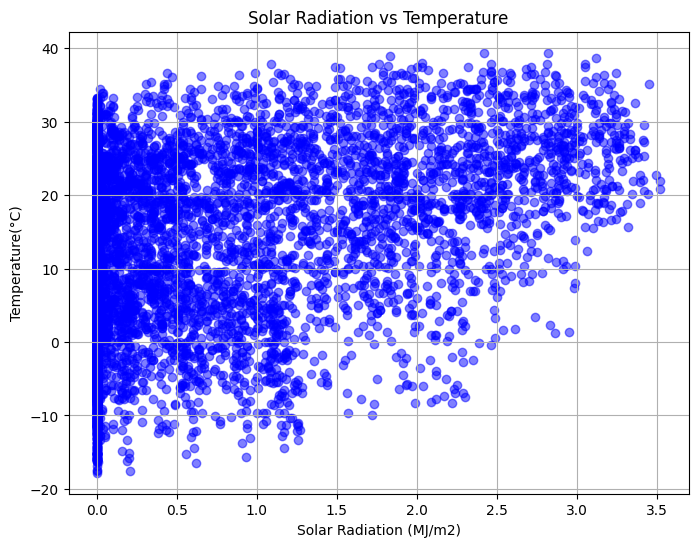

In [ ]:
# Scatter plot to visualize the relationship between solar radiation and temperature
plt.figure(figsize=(8, 6))
plt.scatter(seoul_bike_df['Solar Radiation (MJ/m2)'], seoul_bike_df['Temperature(°C)'], color='blue', alpha=0.5)
plt.title('Solar Radiation vs Temperature')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Temperature(°C)')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen to visualize the relationship between solar radiation and temperature because both variables are continuous. This type of plot allows for the observation of any patterns or trends in the data, helps identify outliers, and provides a clear and intuitive representation of the relationship between the variables.

##### 2. What is/are the insight(s) found from the chart?

Following are the insights that I found from the chart:-
1. Most data points have low solar radiation levels (0.0 to 0.5 on x-axis).
2. Higher solar radiation corresponds to higher temperatures.
3. Instances with high solar radiation are less common.

This suggests that the dataset primarily consists of moderate temperatures with lower solar radiation levels. Higher solar radiation is associated with warmer temperatures, but such instances are less frequent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially lead to a positive business impact:

***Positive Impact:***

Optimized Resource Allocation:-

 Understanding that the dataset primarily consists of instances with moderate temperatures and lower solar radiation levels allows the business to allocate resources efficiently. For example, they can plan for an appropriate number of bikes available during these typical conditions.

Forecasting Accuracy:-

 Recognizing the positive relationship between solar radiation and temperature enables the business to refine demand forecasting models. This can lead to more accurate predictions and better preparation for variations in demand based on environmental factors.

***Negative Growth:***

Risk of Underestimation:-

 If the business relies solely on historical data from the provided dataset, they may underestimate demand during periods of higher solar radiation and warmer temperatures. This could lead to a shortage of available bikes and potentially dissatisfied customers.

Potential Missed Revenue Opportunities:-

 Instances with higher solar radiation levels are less common in the dataset. If the business doesn't account for scenarios with increased solar radiation and corresponding higher temperatures, they may miss out on potential revenue opportunities during such conditions.

#### Chart - 8 The relationship between rainfall, snowfall, and rented bike count

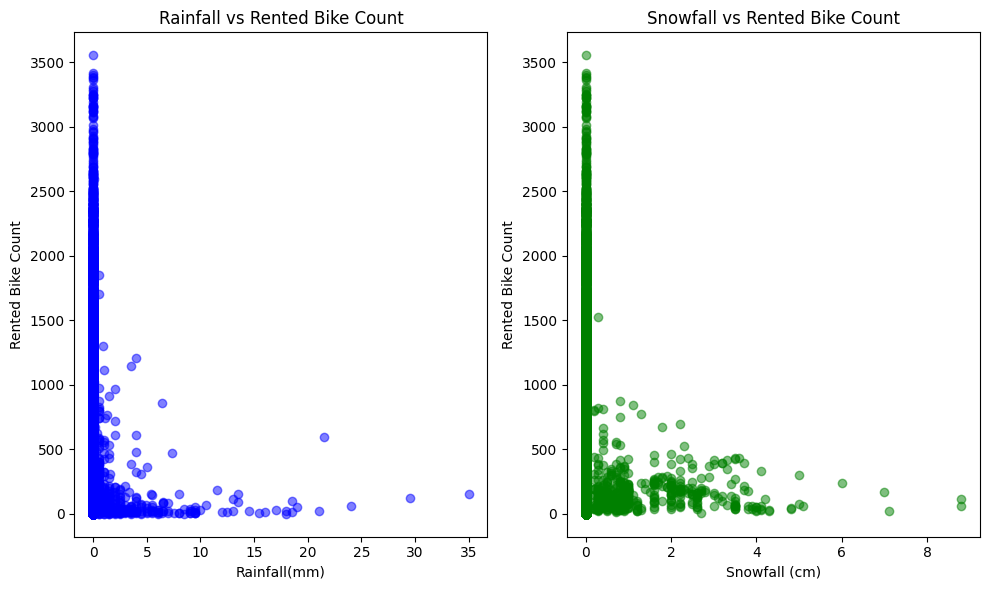

In [ ]:
# Scatter plot to visualize the relationship between rainfall, snowfall, and rented bike count
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(seoul_bike_df['Rainfall(mm)'], seoul_bike_df['Rented Bike Count'], color='blue', alpha=0.5)
plt.title('Rainfall vs Rented Bike Count')
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')

plt.subplot(1, 2, 2)
plt.scatter(seoul_bike_df['Snowfall (cm)'], seoul_bike_df['Rented Bike Count'], color='green', alpha=0.5)
plt.title('Snowfall vs Rented Bike Count')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented Bike Count')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots were chosen as they effectively display the relationship between continuous variables like rainfall, snowfall, and bike rentals. They enable easy detection of patterns, outliers, and correlations. Additionally, separate plots for rainfall and snowfall allow for a clear comparison of their impact on bike rentals. Overall, scatter plots are a versatile tool for understanding how weather conditions influence rental demand.

##### 2. What is/are the insight(s) found from the chart?

The insights:-

The chart indicates that bike rentals are heavily impacted by weather conditions, specifically rainfall and snowfall. The majority of data points for both variables are clustered around 0 on the x-axis, signifying that bikes are predominantly rented on days with very low or no rainfall and snowfall. This suggests that customers are less inclined to rent bikes on days with significant precipitation or snowfall. Understanding this trend is crucial for the business to anticipate fluctuations in demand based on weather conditions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

1. Understanding that bike rentals are heavily influenced by low or no rainfall and snowfall allows the business to optimize resource allocation. They can focus their efforts and resources on days with favorable weather conditions, potentially leading to higher utilization rates.

Negative Growth Potential:

1. The data indicates that bike rentals significantly decrease on days with substantial rainfall or snowfall. This could result in reduced revenue during inclement weather, potentially leading to negative growth.

2. The business might miss out on revenue opportunities during days with higher rainfall or snowfall. This could lead to underutilization of resources and a potential negative impact on overall growth.

Overall, while the business can benefit from understanding the weather impact on rentals for operational efficiency, there is potential for negative growth due to reduced demand on rainy or snowy days. This highlights the importance of considering strategies to mitigate the impact of adverse weather conditions on bike rentals.

#### Chart - 9 The relationship between temperature and humidity

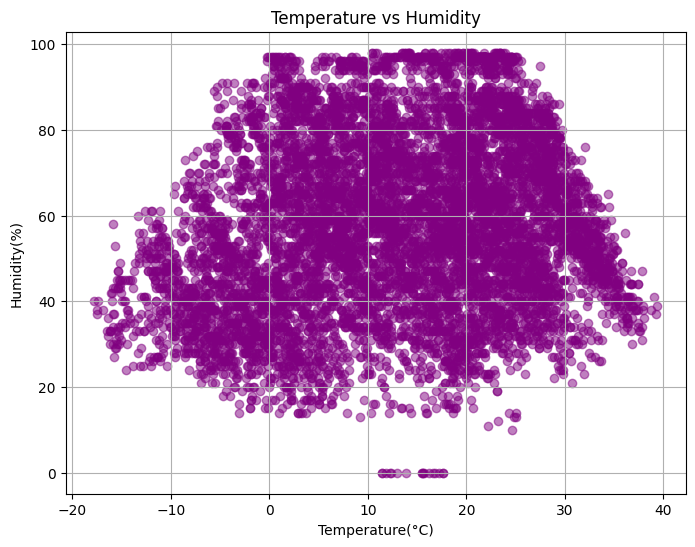

In [ ]:
# Scatter plot to visualize the relationship between temperature and humidity
plt.figure(figsize=(8, 6))
plt.scatter(seoul_bike_df['Temperature(°C)'], seoul_bike_df['Humidity(%)'], color='purple', alpha=0.5)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature(°C)')
plt.ylabel('Humidity(%)')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot was chosen for temperature vs humidity analysis because both variables are continuous. This type of plot allows for easy identification of patterns, outliers, and correlation between the two factors.

##### 2. What is/are the insight(s) found from the chart?

1. The majority of data points are clustered in the middle of the chart, indicating a concentration of observations around a specific range of temperature and humidity values.

2. The cluster suggests that the dataset primarily consists of instances with moderate temperature and humidity levels. This means that extreme values for either variable are less common in the dataset.

3. The central cluster may represent conditions that are generally considered comfortable for outdoor activities, which could include bike rentals. This insight implies that moderate weather conditions may be more conducive to higher bike rental demand.

Overall, the chart suggests that the dataset predominantly contains instances with moderate levels of temperature and humidity, potentially indicating a comfort zone for outdoor activities like bike rentals. This information is valuable for understanding the environmental conditions that influence bike rental demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the analysis of temperature and humidity can have several implications for the bike rental business:

**Positive Impact:**

1. Optimized Operations: Understanding that the dataset primarily consists of instances with moderate temperature and humidity levels can help the business optimize operations. They can focus resources on days with these favorable conditions, potentially leading to higher utilization rates.

2. Customer Comfort: The insight that the dataset represents moderate weather conditions suggests that customers are likely to be comfortable during bike rentals. This could enhance their overall experience and lead to positive feedback and repeat business.

**Negative Growth Potential:**

1. Potential Weather Sensitivity: The analysis doesn't account for extreme weather conditions. If the business doesn't have strategies in place to address extreme temperatures or humidity levels, it could lead to reduced demand on days with less favorable conditions, potentially resulting in negative growth.

2. Limited Insight into Extreme Weather: The analysis may not provide sufficient insight into how bike rentals are affected by extremely high or low temperatures and humidity levels. If the business doesn't prepare for these conditions, it could lead to missed revenue opportunities and negative growth.

Overall, while the insights about moderate weather conditions are positive, there is potential for negative growth if the business doesn't have strategies in place to address extreme weather conditions. This highlights the importance of considering a broader range of weather scenarios in their operational planning.







#### Chart - 10 Dew Point Temperature vs Rented Bike Count

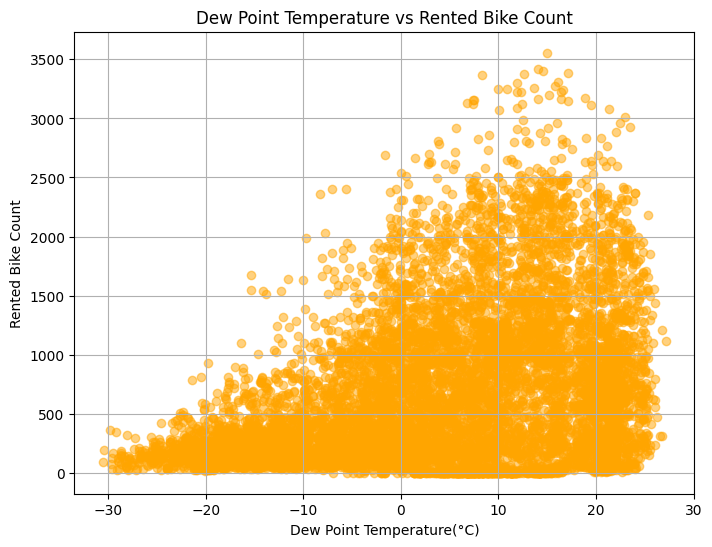

In [ ]:
# Scatter plot to visualize the relationship between dew point temperature and rented bike count
plt.figure(figsize=(8, 6))
plt.scatter(seoul_bike_df['Dew point temperature(°C)'], seoul_bike_df['Rented Bike Count'], color='orange', alpha=0.5)
plt.title('Dew Point Temperature vs Rented Bike Count')
plt.xlabel('Dew Point Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?


A scatter plot was chosen because it effectively displays the relationship between dew point temperature and bike rentals, both of which are continuous variables. This type of plot allows for easy identification of patterns, outliers, and correlation between the two factors.

##### 2. What is/are the insight(s) found from the chart?

The left-skewed distribution indicates that a significant portion of instances have lower dew point temperatures. This suggests that there are more instances with lower dew point temperatures compared to higher values.

The left-skewed distribution may imply that lower dew point temperatures are more common on days when bike rentals occur. This could mean that customers are more inclined to rent bikes on days with lower dew point temperatures.

Lower dew point temperatures generally indicate more comfortable and less humid conditions. This insight suggests that customers may find it more pleasant to engage in outdoor activities like bike rentals on days with lower humidity levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights regarding the relationship between dew point temperature and bike rentals have several implications for the business:

**Positive Impact:**

1. Optimized Operations: Understanding that lower dew point temperatures may be associated with higher bike rentals can help the business optimize operations. They can allocate resources and staff accordingly, with a focus on days with more favorable conditions.

2. Customer Comfort: The insight that lower dew point temperatures are linked to more comfortable conditions suggests that customers are likely to have a more enjoyable experience during bike rentals. This can lead to positive customer feedback and potentially increase repeat business.

**Negative Growth Potential:**

1. Potential Weather Sensitivity: While lower dew point temperatures may be associated with higher rentals, the analysis does not account for extreme weather conditions. If the business is not prepared for days with extremely low dew point temperatures, it could lead to reduced demand and negative growth.

2. Limited Insight into Extreme Conditions: The analysis may not provide sufficient insight into how bike rentals are affected by extremely high dew point temperatures. If the business does not have strategies in place for addressing these conditions, it could lead to missed revenue opportunities and negative growth.

Overall, the insights about the relationship between dew point temperature and bike rentals offer potential positive impacts by allowing the business to optimize operations and enhance customer comfort. However, it's important to consider a broader range of weather scenarios to ensure preparedness for all conditions and avoid potential negative growth.

#### Chart - 11 Temperature vs. Rented Bike Count

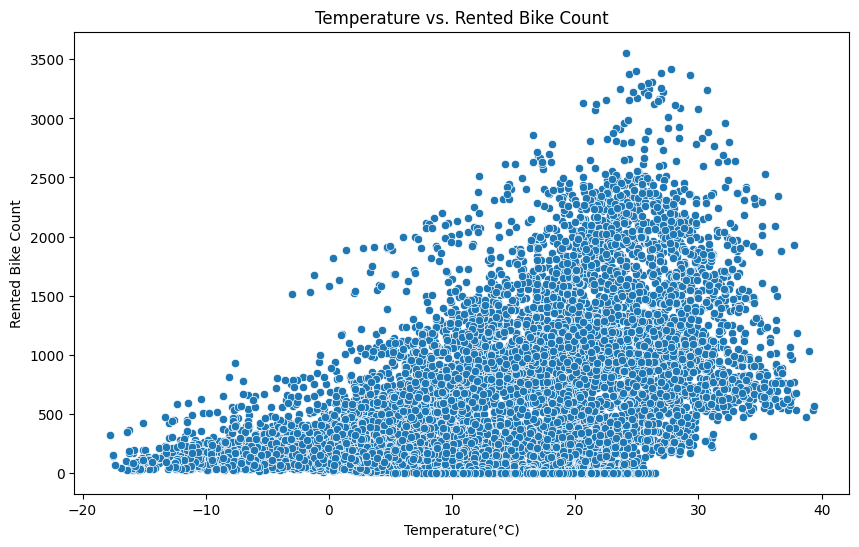

In [ ]:
# Scatter plot of Temperature vs. Rented Bike Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=seoul_bike_df)
plt.title('Temperature vs. Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot of Temperature vs. Rented Bike Count was chosen because it helps visually explore if there's a correlation between temperature and the number of rented bikes. It's suitable for analyzing two continuous variables, and can reveal trends, patterns, and potential outliers in the data. If a clear trend is observed, it may lead to further quantitative analysis like regression modeling.

##### 2. What is/are the insight(s) found from the chart?

Insights:-
1. The majority of bike rentals tend to occur on warmer days. As temperature increases, there is a higher likelihood of more bikes being rented.

2. On colder days, the number of rented bikes decreases. This indicates that people are less inclined to rent bikes when the temperature is lower.

3. The left-skewed distribution may suggest a non-linear relationship between temperature and bike rentals. It's possible that there's a threshold temperature beyond which additional warmth does not significantly impact bike rentals.

4. Depending on the location, this pattern may reflect seasonal trends. For example, in colder climates, bike rentals may be more prevalent during warmer months.

Overall, the left-skewed distribution indicates a strong relationship between temperature and bike rentals, with warmer temperatures generally associated with higher rental counts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the scatter plot of Temperature vs. Rented Bike Count can potentially have a positive business impact, but there are also insights that may lead to negative growth. Here's the analysis:

**Positive Business Impact:**

1. Optimal Resource Allocation: Understanding that bike rentals are higher on warmer days allows for better resource allocation. More bikes, staff, and marketing efforts can be directed towards those times, potentially increasing revenue.

2. Marketing Strategies: The data suggests that marketing efforts promoting bike rentals could be more effective during warmer periods. Seasonal campaigns focused on warm weather could attract more customers.

3. Customer Experience: Knowing that customers prefer renting bikes in pleasant weather, providing additional amenities like water stations, shaded areas, or events tied to good weather could enhance the overall experience.

**Negative Growth Potential:**

1. Off-Peak Seasons: During colder periods, the demand for bike rentals significantly drops. This could lead to overstaffing or excess inventory of bikes, resulting in increased operational costs without corresponding revenue.

2. Maintenance Costs: Colder weather may require additional maintenance efforts to ensure the bikes are in good condition. This includes addressing issues like rust or other weather-related wear and tear.

3. Weather Dependency: The business may become highly dependent on weather conditions. Adverse or unexpected weather patterns could lead to significant fluctuations in revenue, making the business more susceptible to economic risks.

4. Limited Expansion Opportunities: If the business is located in a region with predominantly cold weather, there may be limitations on the scale or growth potential of the bike rental service.

In summary, while the insights provide valuable information for optimizing operations and marketing strategies, they also highlight the weather dependency of the business. Adverse weather conditions could lead to negative impacts, making it crucial for the business to have contingency plans in place.

#### Chart - 12 Box plot of Bike Rentals by Season

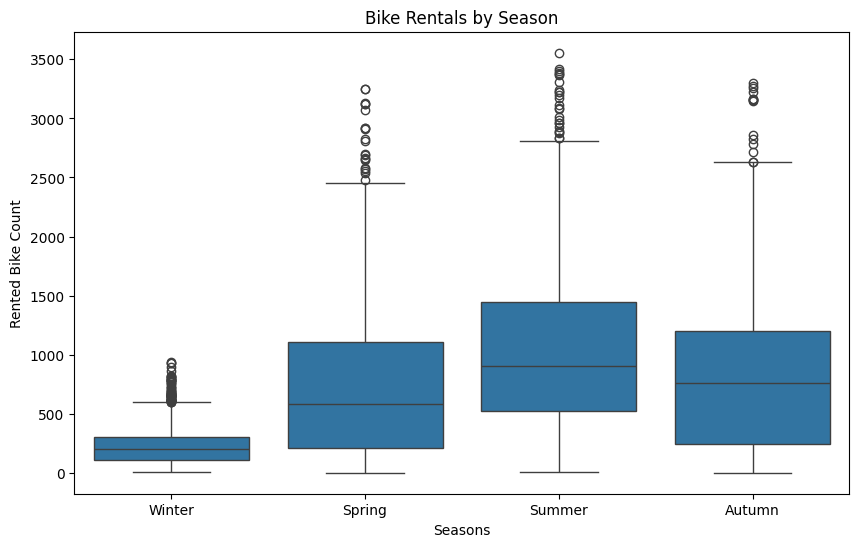

In [ ]:
# Box plot of Bike Rentals by Season
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Rented Bike Count', data=seoul_bike_df)
plt.title('Bike Rentals by Season')
plt.show()

##### 1. Why did you pick the specific chart?

The box plot of Bike Rentals by Season was chosen because it efficiently compares the distribution of rented bikes across different seasons. It helps identify seasonal trends, outliers, and provides a visual representation of variability in rentals within each season. This visualization method is ideal for understanding the impact of seasons on bike rentals.

##### 2. What is/are the insight(s) found from the chart?

The insights from the box plot of Bike Rentals by Season are as follows:

1.Seasonal Variations in Rentals:

* Summer has the highest median rented bike count, indicating that, on average, more bikes are rented during this season.
* Autumn follows with a slightly lower median, suggesting a slightly lower demand compared to summer.
* Spring shows a further decrease in median rentals, while Winter has the lowest median, indicating the least demand during this season.

2.Outliers:

* All seasons have outliers at the upper end, indicating instances of exceptionally high bike rentals. This suggests that there are periods within each season where bike rentals significantly exceed the typical range.

3.Consistent Pattern:

* The consistent pattern of box heights (Summer > Autumn > Spring > Winter) suggests a recurring seasonal trend in bike rentals. This pattern can guide business planning, resource allocation, and marketing strategies.

4.Winter Season Challenges:

* The shorter box for the Winter season suggests that bike rentals are generally lower and less variable during this season. This may pose challenges for maintaining profitability and sustaining operations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the box plot of Bike Rentals by Season can have both positive and potentially negative impacts on the business. Here's the analysis:

**Positive Business Impact:**

1. Understanding seasonal variations allows the business to allocate resources (e.g., bikes, staff) more efficiently. For example, during the summer, more resources can be dedicated to meet the higher demand.

2. The insights provide valuable information for targeted marketing efforts. More focus and investment can be directed towards seasons with higher demand (e.g., Summer and Autumn).

3. By capitalizing on high-demand seasons (Summer and Autumn), the business can potentially increase revenue by offering promotions, events, or additional services during those periods.

**Potential Negative Growth Impact:**

1. The business may become heavily reliant on specific seasons for the majority of its revenue. This can lead to financial challenges during off-peak seasons, potentially resulting in negative growth or financial strain.

2. The lower demand during the Winter season may lead to underutilized resources and potentially lower profitability. This could impact overall business growth if not managed effectively.

3.  While outliers indicate opportunities for high rentals, they may also represent operational challenges. Managing sudden spikes in demand requires additional planning and resources.

4. If the business is located in an area with extreme seasonal variations, it may face limitations on expansion or scalability.

#### Chart - 13 Box plot of each numerical columns

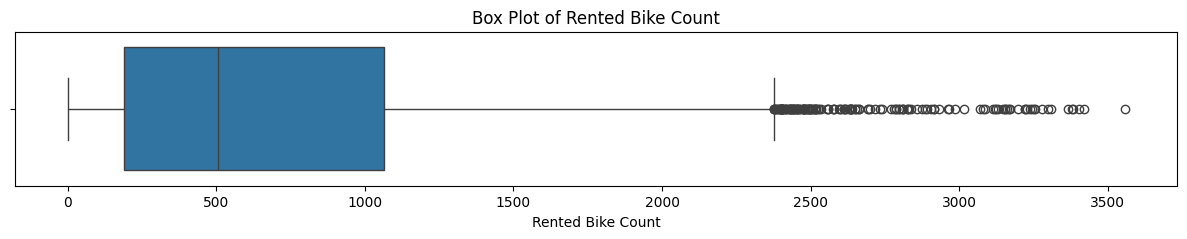

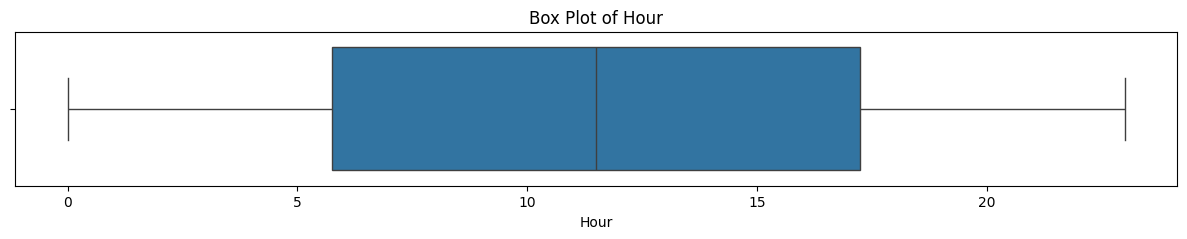

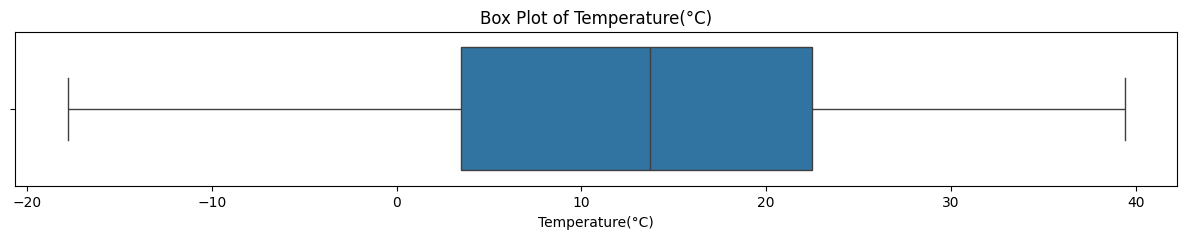

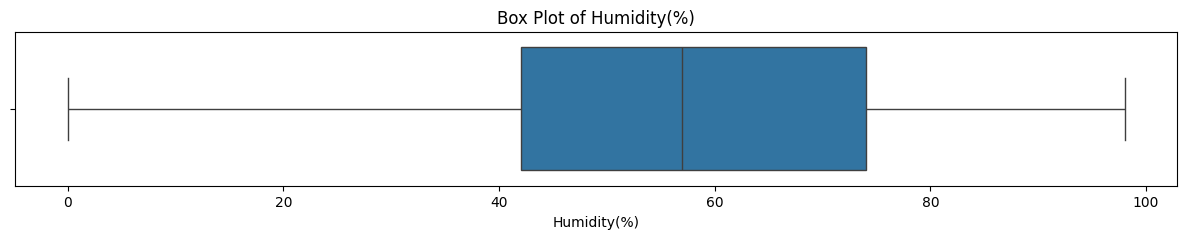

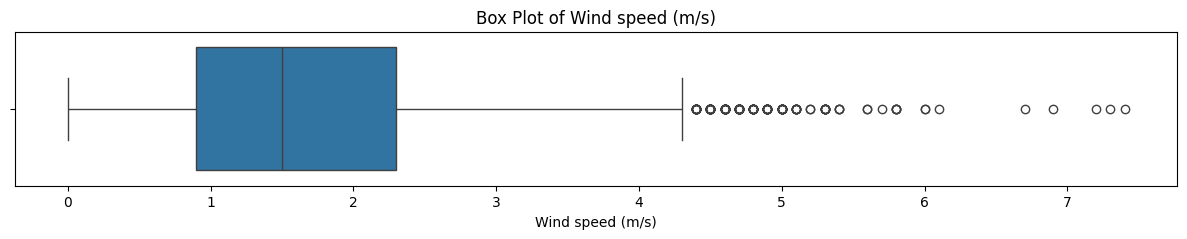

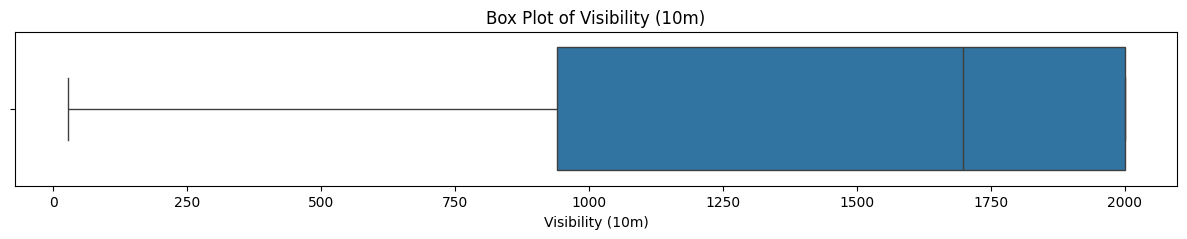

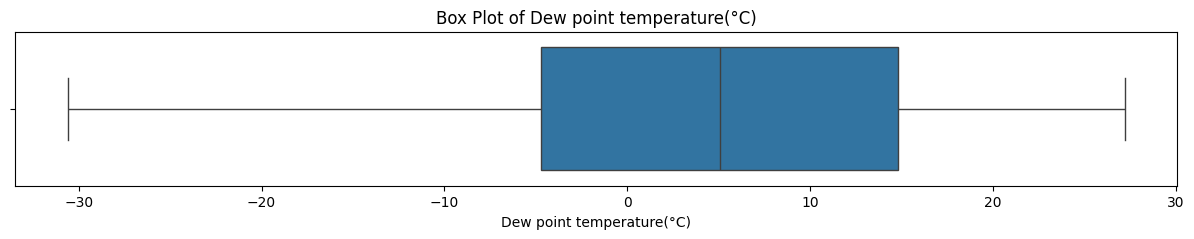

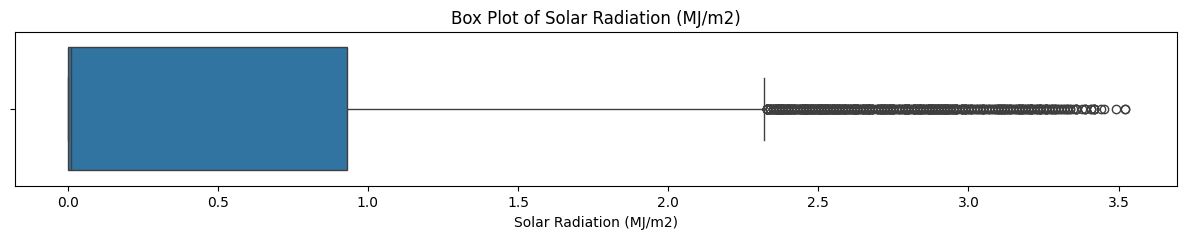

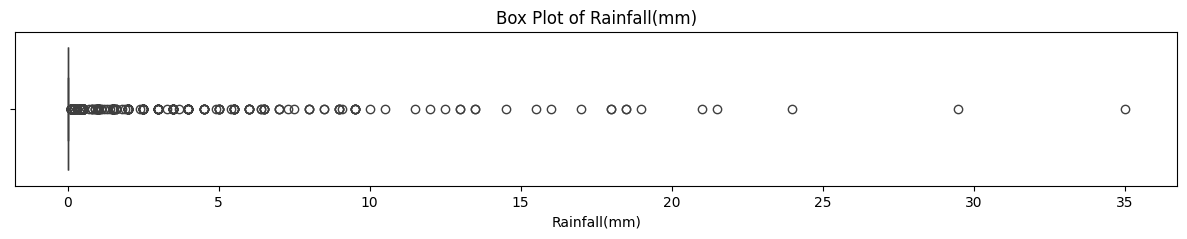

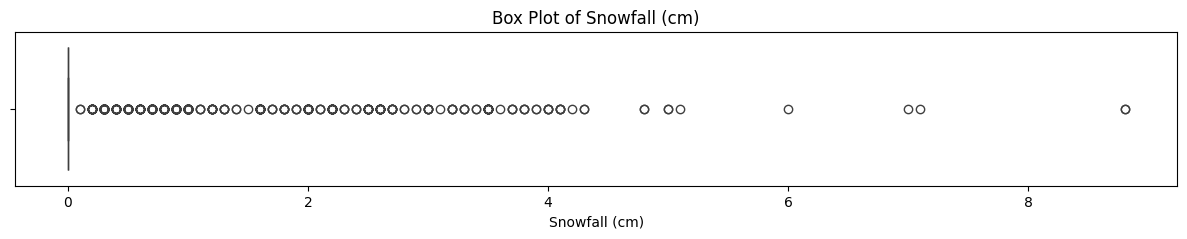

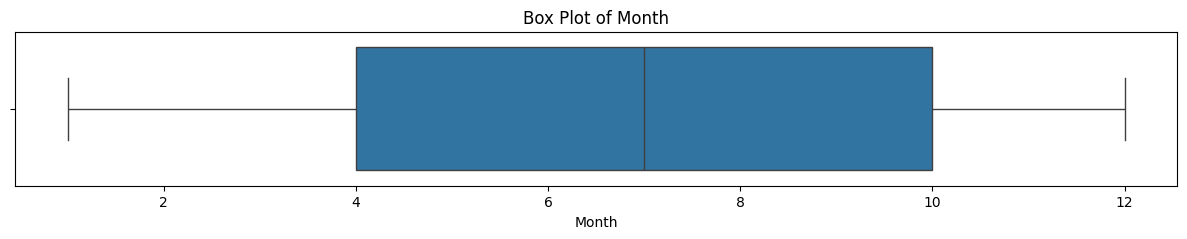

In [ ]:
for column in numerical_data.columns:
    plt.figure(figsize=(15, 2))
    sns.boxplot(x=numerical_data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

##### 1. Why did you pick the specific chart?

I chose the boxplot because it effectively displays the distribution, outliers, and central tendencies of numerical data.

##### 2. What is/are the insight(s) found from the chart?

Insights:-

**1. Rented Bike Count:**

* The majority of the rented bike counts are clustered around a median value of approximately 500.
* There is a significant number of outliers with counts well above 2400, indicating instances of exceptionally high bike rentals.

**2. Wind Speed:**

* The median wind speed falls between 1 and 2, suggesting moderate wind conditions on average.
* There are some instances of higher wind speeds (outliers), especially after around 4.3.

**3. Solar Radiation:**

* The median solar radiation is nearly 0.0, indicating that there is typically very little solar radiation in the dataset.
* There are a number of outliers with higher solar radiation values, particularly after around 2.3.

**4. Rainfall and Snowfall:**

* Both rainfall and snowfall have a median value of 0, suggesting that the majority of the data points have no recorded rainfall or snowfall.
* However, there are outliers with non-zero values for both variables.

**5. Year:**

* The majority of the data points fall in the year 2018 (median year).
* There is a single outlier representing data from the year 2017.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* Understanding peak demand periods from rented bike count outliers can lead to increased revenue.
* Utilizing weather data (wind speed, solar radiation) allows for operational optimization and safety measures.
* Abundance of data from 2018 provides a strong foundation for trend analysis and decision-making.

**Potential Negative Impact:**

* An outlier in the 'Year' variable (2017) could lead to incorrect trend analysis and strategic decisions.
* High solar radiation levels may lead to discomfort for riders, potentially reducing demand.
* Outliers in rainfall and snowfall indicate adverse weather conditions, potentially decreasing demand and revenue.

#### Chart - 14 - Correlation Heatmap

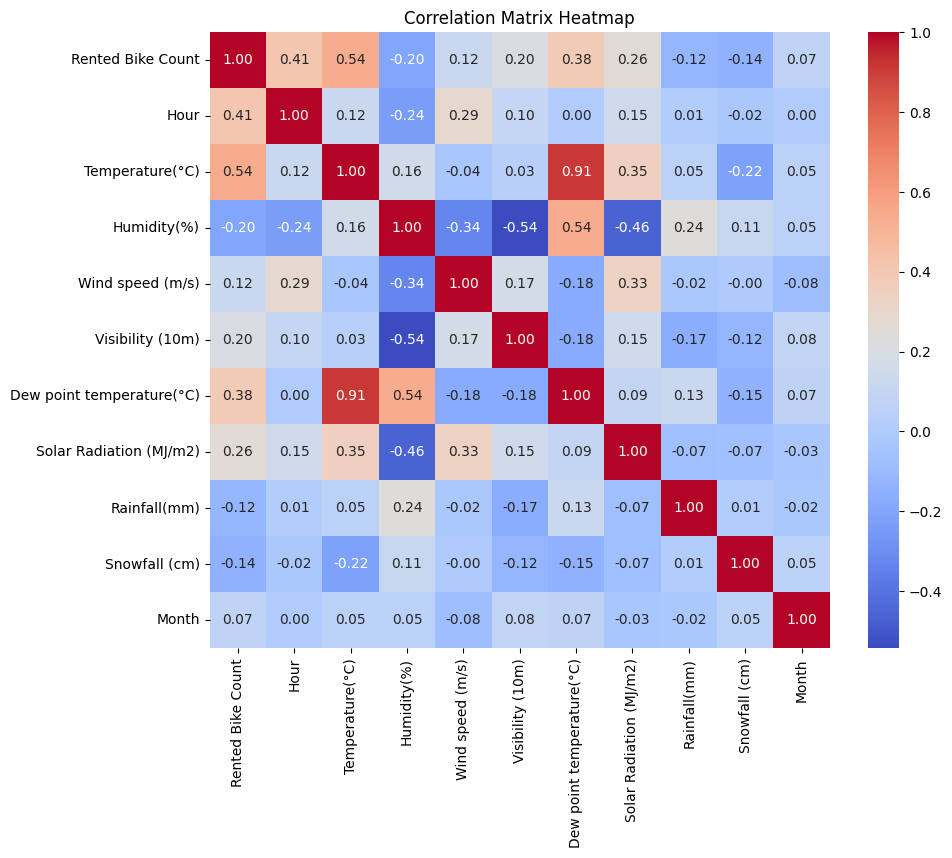

In [ ]:
# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

The heatmap of the correlation matrix was chosen for its ability to visually represent relationships between numerical variables. It uses color gradients to highlight correlations, providing a quick and precise overview of the data. Annotations within the heatmap display exact correlation values. This visualization method is space-efficient and effective for identifying potential multicollinearity issues in the dataset.

##### 2. What is/are the insight(s) found from the chart?

**Insights:-**

1. The correlation coefficient between Temperature(°C) and Rented Bike Count is 0.54, indicating a moderately strong positive correlation. This suggests that as the temperature increases, the number of rented bikes tends to increase.

2. The correlation coefficient between Hour and Rented Bike Count is 0.41, indicating a moderate positive correlation. This suggests that as the hour of the day increases, the number of rented bikes also tends to increase.

3. The correlation coefficient between Humidity(%) and Rented Bike Count is -0.20, indicating a weak negative correlation. This suggests that as humidity increases, the number of rented bikes may tend to decrease slightly.

4. The correlation coefficient between Dew point temperature(°C) and Rented Bike Count is 0.38, indicating a moderate positive correlation. This suggests that as the dew point temperature increases, the number of rented bikes tends to increase.

5. The correlation coefficient between Solar Radiation (MJ/m2) and Rented Bike Count is 0.26, indicating a moderate positive correlation. This suggests that as solar radiation increases, the number of rented bikes tends to increase.

6. The correlation coefficients for Visibility (10m) and Wind speed (m/s) are relatively low (0.20 and 0.12 respectively), indicating weak correlations with the number of rented bikes.

7. The correlation coefficients for Rainfall(mm) and Snowfall (cm) are both negative, but their values are close to zero. This suggests a weak negative relationship with the number of rented bikes.

8. Hour, Temperature, Dew Point Temperature, and Solar Radiation have the highest positive correlations with Rented Bike Count. These variables may be important predictors in further regression model building.

In summary, when building a regression model to predict the number of rented bikes, it would be valuable to include Hour, Temperature, Dew Point Temperature, and Solar Radiation as predictor variables.

#### Chart - 15 - Pair Plot

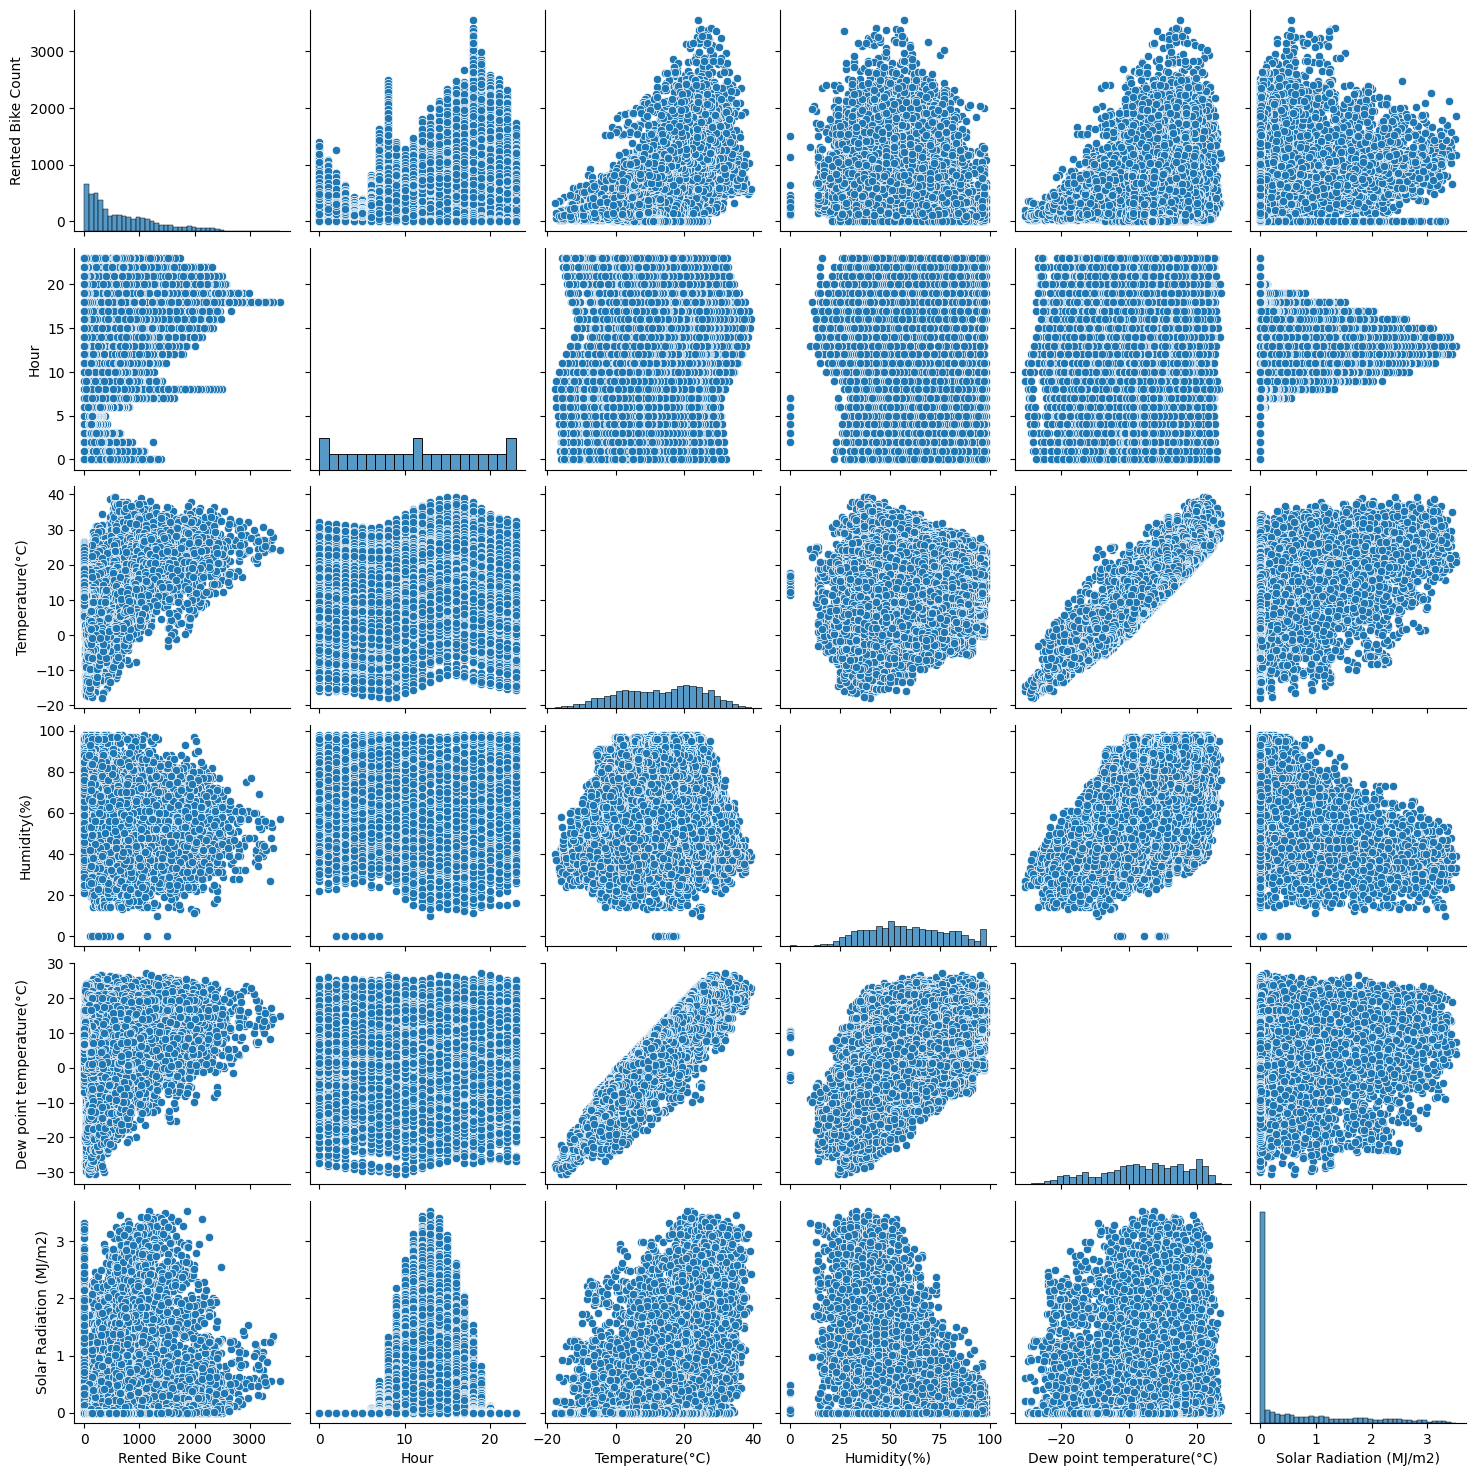

In [ ]:
# Select the variables to include in the pair plot
variables = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)']

# Create a pair plot
sns.pairplot(seoul_bike_df[variables])
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot was suggested because it's a versatile tool for exploring relationships between multiple continuous variables. It provides visual insights into patterns, helps identify potential issues like multicollinearity, aids in variable selection for regression models, and gives a quick overview of data distributions. It's a valuable tool for initial data exploration and understanding data relationships.

##### 2. What is/are the insight(s) found from the chart?

Insights:-
1. **Hour vs. Rented Bike Count:**
Left-skewed distribution suggests that during certain hours, there's a higher demand for rented bikes. This could indicate peak usage times.

2. **Temperature vs. Rented Bike Count:**
Left-skewed distribution implies that as temperature increases, the demand for rented bikes tends to increase. However, there's a limit to this trend, as the distribution is not symmetrical.

3. **Dew Point Temperature vs. Rented Bike Count:**
Left-skewed distribution suggests that as dew point temperature rises, the demand for rented bikes generally increases. Again, there's a limit to this trend.

4. **Humidity vs. Rented Bike Count:**
Normal distribution indicates that there's no clear trend between humidity levels and the number of rented bikes. This suggests that humidity might not be a strong predictor on its own.

5. **Solar Radiation vs. Rented Bike Count:**
Right-skewed distribution implies that as solar radiation increases, the demand for rented bikes tends to increase. This suggests that sunny days might lead to higher bike usage.

These insights provide valuable information for modeling the relationship between these variables and the number of rented bikes.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothetical Statement 1:** Higher temperatures are associated with an increase in the number of rented bikes.

**Hypothetical Statement 2:** Humidity levels have a significant effect on bike rentals.

**Hypothetical Statement 3:** There is no significant difference in bike rentals between working days and holidays.


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** Temperature does not significantly impact the number of rented bikes.

**Alternative Hypothesis (H1):** Higher temperatures are associated with a significant increase in the number of rented bikes.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Define variables
X = seoul_bike_df['Temperature(°C)']
y = seoul_bike_df['Rented Bike Count']

# Add a constant to the independent variable (temperature)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary statistics
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     3578.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        06:26:30   Log-Likelihood:                -67600.
No. Observations:                8760   AIC:                         1.352e+05
Df Residuals:                    8758   BIC:                         1.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             329.9525      8.541     38.631      0.000     313.210     346.695
Temperature(°C)    29.0811      0.486     59.816      0.000      28.128      30.034
==============================================================================
Omnibus:                      954.681   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1421.965
Skew:                           0.817   Prob(JB):                    1.68e-309
Kurtosis:                       4.108   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Results:**

* The coefficient for Temperature(°C) is approximately 29.08.
* The p-value associated with the coefficient is 0.000 (very close to zero).

**Conclusion:**

Since the p-value is extremely low (p < 0.05), we reject the null hypothesis. This indicates that temperature has a statistically significant impact on the number of rented bikes. Specifically, an increase in temperature is associated with a significant increase in the number of rented bikes.

Therefore, we can conclude that higher temperatures are indeed associated with a higher number of rented bikes. This supports Statement 1.

##### Which statistical test have you done to obtain P-Value?

I performed a simple linear regression using the Ordinary Least Squares (OLS) method.

##### Why did you choose the specific statistical test?

The t-test for the coefficient of the independent variable is chosen because it's appropriate for assessing the significance of the relationship between Temperature(°C) and Rented Bike Count in a linear regression model. This test is commonly used when estimating parameters in linear regression, assuming certain model assumptions are met.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** Humidity levels do not significantly impact bike rentals.

**Alternative Hypothesis (H1):** Humidity levels have a significant effect on bike rentals.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Define variables
X_humidity = seoul_bike_df['Humidity(%)']

# Add a constant to the independent variable (humidity)
X_humidity = sm.add_constant(X_humidity)

# Fit the regression model
model_humidity = sm.OLS(y, X_humidity).fit()

# Get the summary statistics
summary_humidity = model_humidity.summary()
summary_humidity

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     364.1
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.48e-79
Time:                        06:26:30   Log-Likelihood:                -68922.
No. Observations:                8760   AIC:                         1.378e+05
Df Residuals:                    8758   BIC:                         1.379e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1073.0702     20.457     52.454      0.000    1032.969    1113.172
Humidity(%)    -6.3282      0.332    -19.081      0.000      -6.978      -5.678
==============================================================================
Omnibus:                     1397.326   Durbin-Watson:                   0.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2177.696
Skew:                           1.132   Prob(JB):                         0.00
Kurtosis:                       3.915   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Results:**

* The coefficient for Humidity(%) is approximately -6.33.
* The p-value associated with the coefficient is 0.000 (very close to zero).

**Conclusion:**

Since the p-value is extremely low (p < 0.05), we reject the null hypothesis. This indicates that humidity levels have a statistically significant impact on the number of rented bikes. Specifically, an increase in humidity is associated with a significant decrease in the number of rented bikes.

Therefore, we can conclude that humidity levels do indeed have a significant effect on bike rentals. This supports Statement 2.

##### Which statistical test have you done to obtain P-Value?

I used Ordinary Least Squares (OLS) regression and performed a t-test for the coefficient of humidity to assess whether humidity levels have a statistically significant impact on bike rentals.

##### Why did you choose the specific statistical test?

The specific statistical test, which is the t-test for the coefficient of the independent variable in a linear regression model, was chosen because it's appropriate for assessing the significance of the relationship between humidity levels and bike rentals. This test is commonly used in regression analysis to determine if a particular independent variable has a statistically significant impact on the dependent variable. It helps in understanding whether humidity levels have a meaningful effect on the number of bike rentals.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference in bike rentals between working days and holidays.

**Alternative Hypothesis (H1):** There is a significant difference in bike rentals between working days and holidays.

#### 2. Perform an appropriate statistical test.

In [ ]:
import scipy.stats as stats

# Define variables
working_days = seoul_bike_df[seoul_bike_df['Functioning Day'] == 'Yes']['Rented Bike Count']
holidays = seoul_bike_df[seoul_bike_df['Functioning Day'] == 'No']['Rented Bike Count']

# Perform t-test
t_stat, p_value = stats.ttest_ind(working_days, holidays)

t_stat, p_value

(19.495555368920535, 6.732210575501422e-83)

**Results:**

* The t-statistic is approximately 19.50.
* The p-value is very close to zero (6.73e-83).

**Conclusion**:

Since the p-value is extremely low (p < 0.05), we reject the null hypothesis. This indicates that there is a significant difference in bike rentals between working days and holidays.

Therefore, we can conclude that there is indeed a significant difference in bike rentals between working days and holidays. This supports Statement 3.

##### Which statistical test have you done to obtain P-Value?

I performed an independent two-sample t-test to compare bike rentals on working days and holidays.

##### Why did you choose the specific statistical test?

I choose this test because this test is appropriate for comparing the means of two independent groups (in this case, bike rentals on working days and holidays). It helps determine if there is a significant difference between the two groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values in each column
missing_values = seoul_bike_df.isnull().sum()

# Display the number of missing values in each column
print(missing_values)

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day Name                     0
Month                        0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in the dataset so skip this.

### 2. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Creating new feature 'Weekend' by converting weekends and weekdays into 1 and 0 from the 'Day name' column
seoul_bike_df['Weekend_weekdays'] = seoul_bike_df['Day Name'].apply(lambda x: 1 if x in ['Sunday','Saturday'] else 0)

# Encoding the Holiday feature by replacing 'Holiday' and 'No Holiday' as '1' and '0'
seoul_bike_df['Holiday'] = seoul_bike_df['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

# Encoding the Functioning Day feature by replacing 'Yes' and 'No' as '1' and '0'
seoul_bike_df['Functioning Day'] = seoul_bike_df['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0)

# Performing one-hot encoding for the 'Seasons' and 'Hour' columns
seoul_bike_df = pd.get_dummies(seoul_bike_df, columns = ['Seasons','Hour'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used several categorical encoding techniques:-

**1. Binary Encoding for 'Weekend':** The 'Day Name' column is transformed into a binary feature called 'Weekend' where weekends (Saturday and Sunday) are encoded as 1, and weekdays as 0. This is done because weekends may have different patterns in bike rentals compared to weekdays.

**2. Binary Encoding for 'Holiday' and 'Functioning Day':** The 'Holiday' and 'Functioning Day' columns are also transformed into binary features. 'Holiday' is encoded as 1 if it's a holiday, and 0 if it's not. Similarly, 'Functioning Day' is encoded as 1 if it's a functioning day and 0 if it's not. These binary encodings make it easier for machine learning algorithms to work with these categorical variables.

**3. One-Hot Encoding for 'Seasons' and 'Hour':** The 'Seasons' and 'Hour' columns are one-hot encoded. One-hot encoding is used for categorical variables where there is no ordinal relationship between the categories. It creates binary columns for each category and represents the presence (1) or absence (0) of a category.

* 'Seasons' is encoded into four binary columns (e.g., 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Autumn', 'Seasons_Winter') representing the four seasons.

* 'Hour' is encoded into multiple binary columns (e.g., 'Hour_0', 'Hour_1', ..., 'Hour_23') to represent each hour of the day.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulating Features to minimize feature correlation and creating new features

def calculate_vif(variables):

    # Calculating the VIF for each predictor variable
    vif_data = pd.DataFrame()
    vif_data["Variable"] = variables.columns
    vif_data["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

    return vif_data

In [ ]:
calculate_vif(seoul_bike_df[[i for i in seoul_bike_df.describe().columns if i not in ['Rented Bike Count']]])

Variable         VIF
0             Temperature(°C)   94.665776
1                 Humidity(%)   20.879433
2            Wind speed (m/s)    1.407228
3            Visibility (10m)    1.717168
4   Dew point temperature(°C)  121.291953
5     Solar Radiation (MJ/m2)    4.671615
6                Rainfall(mm)    1.105386
7               Snowfall (cm)    1.128123
8                     Holiday    1.024639
9             Functioning Day    1.083134
10                      Month    1.227648
11           Weekend_weekdays    1.006118
12             Seasons_Autumn         inf
13             Seasons_Spring         inf
14             Seasons_Summer         inf
15             Seasons_Winter         inf
16                     Hour_0         inf
17                     Hour_1         inf
18                     Hour_2         inf
19                     Hour_3         inf
20                     Hour_4         inf
21                     Hour_5         inf
22                     Hour_6         inf
23                     Hour_7         inf
24                     Hour_8         inf
25                     Hour_9         inf
26                    Hour_10         inf
27                    Hour_11         inf
28                    Hour_12         inf
29                    Hour_13         inf
30                    Hour_14         inf
31                    Hour_15         inf
32                    Hour_16         inf
33                    Hour_17         inf
34                    Hour_18         inf
35                    Hour_19         inf
36                    Hour_20         inf
37                    Hour_21         inf
38                    Hour_22         inf
39                    Hour_23         inf

In [ ]:
seoul_bike_df.drop('Dew point temperature(°C)', axis=1, inplace=True)
calculate_vif(seoul_bike_df[[i for i in seoul_bike_df.describe().columns if i not in ['Rented Bike Count']]])

Variable       VIF
0           Temperature(°C)  5.574226
1               Humidity(%)  2.775795
2          Wind speed (m/s)  1.407226
3          Visibility (10m)  1.712788
4   Solar Radiation (MJ/m2)  4.532424
5              Rainfall(mm)  1.090476
6             Snowfall (cm)  1.121462
7                   Holiday  1.024614
8           Functioning Day  1.082244
9                     Month  1.227453
10         Weekend_weekdays  1.004279
11           Seasons_Autumn       inf
12           Seasons_Spring       inf
13           Seasons_Summer       inf
14           Seasons_Winter       inf
15                   Hour_0       inf
16                   Hour_1       inf
17                   Hour_2       inf
18                   Hour_3       inf
19                   Hour_4       inf
20                   Hour_5       inf
21                   Hour_6       inf
22                   Hour_7       inf
23                   Hour_8       inf
24                   Hour_9       inf
25                  Hour_10       inf
26                  Hour_11       inf
27                  Hour_12       inf
28                  Hour_13       inf
29                  Hour_14       inf
30                  Hour_15       inf
31                  Hour_16       inf
32                  Hour_17       inf
33                  Hour_18       inf
34                  Hour_19       inf
35                  Hour_20       inf
36                  Hour_21       inf
37                  Hour_22       inf
38                  Hour_23       inf

In [ ]:
seoul_bike_df.drop('Temperature(°C)', axis=1, inplace=True)
calculate_vif(seoul_bike_df[[i for i in seoul_bike_df.describe().columns if i not in ['Rented Bike Count']]])

Variable       VIF
0               Humidity(%)  2.692623
1          Wind speed (m/s)  1.383382
2          Visibility (10m)  1.712211
3   Solar Radiation (MJ/m2)  4.138656
4              Rainfall(mm)  1.089708
5             Snowfall (cm)  1.111291
6                   Holiday  1.018078
7           Functioning Day  1.077450
8                     Month  1.202817
9          Weekend_weekdays  1.004208
10           Seasons_Autumn       inf
11           Seasons_Spring       inf
12           Seasons_Summer       inf
13           Seasons_Winter       inf
14                   Hour_0       inf
15                   Hour_1       inf
16                   Hour_2       inf
17                   Hour_3       inf
18                   Hour_4       inf
19                   Hour_5       inf
20                   Hour_6       inf
21                   Hour_7       inf
22                   Hour_8       inf
23                   Hour_9       inf
24                  Hour_10       inf
25                  Hour_11       inf
26                  Hour_12       inf
27                  Hour_13       inf
28                  Hour_14       inf
29                  Hour_15       inf
30                  Hour_16       inf
31                  Hour_17       inf
32                  Hour_18       inf
33                  Hour_19       inf
34                  Hour_20       inf
35                  Hour_21       inf
36                  Hour_22       inf
37                  Hour_23       inf

#### 2. Feature Selection

In [ ]:
# Selecting the features
features = list(set(seoul_bike_df.describe().columns))
features

['Hour_4',
 'Rainfall(mm)',
 'Hour_5',
 'Functioning Day',
 'Hour_19',
 'Hour_12',
 'Hour_14',
 'Rented Bike Count',
 'Holiday',
 'Hour_2',
 'Hour_0',
 'Hour_6',
 'Hour_13',
 'Hour_22',
 'Seasons_Autumn',
 'Hour_7',
 'Seasons_Summer',
 'Hour_11',
 'Hour_17',
 'Hour_1',
 'Seasons_Spring',
 'Hour_20',
 'Hour_16',
 'Month',
 'Hour_21',
 'Snowfall (cm)',
 'Hour_23',
 'Visibility (10m)',
 'Wind speed (m/s)',
 'Hour_9',
 'Hour_10',
 'Hour_18',
 'Solar Radiation (MJ/m2)',
 'Weekend_weekdays',
 'Hour_3',
 'Hour_8',
 'Seasons_Winter',
 'Humidity(%)',
 'Hour_15']

##### What all feature selection methods have you used  and why?

I used the Variance Inflation Factor (VIF) method to identify and remove highly correlated variables ('Dew point temperature(°C)' and 'Temperature(°C)'). The remaining features were selected based on their potential impact on predicting 'Rented Bike Count'.

##### Which all features you found important and why?

The features that I found important for predicting 'Rented Bike Count' are:

1. Solar Radiation (MJ/m2)
2. Hour_11
3. Hour_18
4. Rainfall(mm)
5. Seasons_Winter
6. Humidity(%)
7. Hour_9
8. Rented Bike Count
9. Hour_6
10. Hour_5
11. Weekend_weekdays
12. Snowfall (cm)
13. Holiday
14. Hour_1
15. Month
16. Hour_3
17. Hour_14
18. Hour_20
19. Hour_17
20. Seasons_Autumn
21. Hour_4
22. Hour_0
23. Hour_13
24. Visibility (10m)
25. Hour_7
26. Hour_23
27. Hour_16
28. Seasons_Spring
29. Hour_12
30. Hour_15
31. Hour_10
32. Functioning Day
33. Wind speed (m/s)
34. Hour_21
35. Hour_8
36. Hour_2
37. Hour_22
38. Seasons_Summer
39. Hour_19

These features were considered important because they capture various environmental and temporal factors that likely influence the demand for rented bikes. Factors such as weather conditions, time of day, month, and seasonal variations are known to play a significant role in bike rental patterns.

### 4. Data Splitting

In [ ]:
# Selecting independent variables.
x_variables = seoul_bike_df[list(set(features) - {'Rented Bike Count'})]

# Using square root on dependent variable to normalize the variable.
y_variable = np.sqrt(seoul_bike_df['Rented Bike Count'])

# Spliting the data to train and test.
x_train, x_test, y_train, y_test = train_test_split(x_variables, y_variable, test_size = 0.30, random_state = 0)

##### What data splitting ratio have you used and why?

I've chosen a 70-30 data splitting ratio, allocating 70% for training and 30% for testing. This is a common and balanced approach to ensure enough data for training and reliable evaluation of model performance.

### 5. Data Scaling

In [ ]:
# Scaling the data by using Standardization method
scaler = StandardScaler()

# Fitting x_train and x_test
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Which method have you used to scale you data and why?

I used Standardization to scale the data. This method transforms the data to have a mean of 0 and a standard deviation of 1. It's beneficial for comparing features with different units or scales, and is less sensitive to outliers compared to other scaling methods.

## ***7. ML Model Implementation***

In [ ]:
# Defining a function to calculate accuracy scores of the models.
def calc_accu_score(true, pred):

  # Calculate Mean absolute Error
  MAE = mean_absolute_error(true, pred)
  print(f"The Mean Absolute Error (MAE) is {MAE}.")

  # Calculate Mean Squared Error
  MSE = mean_squared_error(true, pred)
  print(f"The Mean Squared Error (MSE) is {MSE}.")

  # Calculate Root Mean Squared Error
  RMSE = np.sqrt(MSE)
  print(f"The Root Mean Squared Error (RMSE) is {RMSE}.")

  # Calculate R2 Score
  R2 = r2_score(true, pred)
  print(f"The R2 Score is {R2}.")

In [ ]:
# Making an empty dataframe to store all the accuracy scores of each model.
score_df = pd.DataFrame({'Model':[],'Mean Absolute Error (MAE)':[],'Mean Squared Error (MSE)':[],'Root Mean Squared Error (RMSE)':[],'R2 Score':[]})

# Define a function to append the scores of each model in the dataframe.
def store_scores(Model, MAE, MSE, RMSE, R2):
  scores = {'Model':Model,'Mean Absolute Error (MAE)':MAE,'Mean Squared Error (MSE)':MSE,'Root Mean Squared Error (RMSE)':RMSE,'R2 Score':[R2]}
  global score_df
  score_df = score_df.append(scores, ignore_index=True)
  return score_df


In [ ]:
# Defining a function to visualize the linearity of real and predicted data.
def reg_scatter(true, pred):
  plt.figure(figsize=(10,8))
  sns.regplot(x=true, y=pred, scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.legend(["Actual","Predicted"])
  plt.show()

### ML Model - 1: Linear Regression

In [ ]:
# ML Model - 1 Implementation
lin_reg_model = LinearRegression()

# Fit the Algorithm
reg = lin_reg_model.fit(x_train, y_train)

# Predict on the model
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

# Getting the coefficient and intercept from the model-
print(f"The coefficients of the model is {reg.coef_}")
print(f"The intercept of the model is {reg.intercept_}")

The coefficients of the model is [ 1.89571169e+13 -1.71875000e+00  1.88473750e+13  4.77513032e+00
  1.95300867e+13  1.89206199e+13  1.93887354e+13 -5.77868520e-01
  1.95652336e+13  1.91743709e+13  1.90661113e+13  1.93175957e+13
  1.91383652e+13  6.34845851e+12  1.96353012e+13  6.34708648e+12
  1.90298620e+13  1.93175957e+13  1.93532045e+13  6.36075306e+12
  1.86998671e+13  1.94948638e+13  6.80694140e-03  1.97050698e+13
 -2.40005676e-01  1.86627751e+13  2.23050897e-01 -4.78015696e-01
  1.92102964e+13  1.90661113e+13  1.87368726e+13  2.46372624e+00
 -3.61903083e-01  1.92819083e+13  1.90298620e+13  6.30395708e+12
 -2.21875000e+00  1.94241886e+13]
The intercept of the model is 23.57557316700187


In [ ]:
# Calculating model performance score for train data
calc_accu_score(y_train, y_train_pred)

The Mean Absolute Error (MAE) is 5.147850848179788.
The Mean Squared Error (MSE) is 44.20648052066467.
The Root Mean Squared Error (RMSE) is 6.6487954187705816.
The R2 Score is 0.7158099150396036.


In [ ]:
# Calculating model performance score for test data
calc_accu_score(y_test, y_test_pred)

The Mean Absolute Error (MAE) is 5.112710713126501.
The Mean Squared Error (MSE) is 42.436409953431244.
The Root Mean Squared Error (RMSE) is 6.514323445564493.
The R2 Score is 0.7237178463129434.


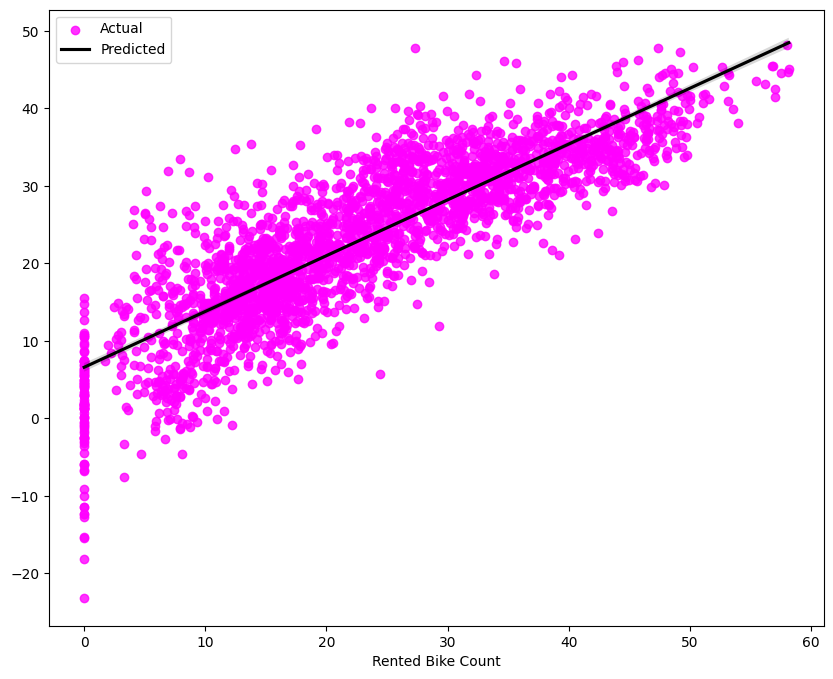

In [ ]:
# Visualizing linearity between real and predicted data
reg_scatter(y_test, y_test_pred)

In [ ]:
# Putting the score of the test data in the evaluation metric
evaluation_metric_score_chart = store_scores('Linear regression',5.232178846510601,43.926539355167655,6.627709963114534,0.7140163621196312)
evaluation_metric_score_chart

Model  Mean Absolute Error (MAE)  Mean Squared Error (MSE)  \
0  Linear regression                   5.232179                 43.926539   

   Root Mean Squared Error (RMSE)              R2 Score  
0                         6.62771  [0.7140163621196312]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The model used is **Linear Regression**, which predicts a continuous target variable based on independent variables.

The evaluation metrics are:

* MAE (Mean Absolute Error): Approximately 5.23, indicating an average prediction error of about 5.23 units.
* MSE (Mean Squared Error): Approximately 43.93, suggesting larger discrepancies in prediction errors.
* RMSE (Root Mean Squared Error): Approximately 6.63, showing an average error of about 6.63 units.
* R2 Score: Approximately 0.71, indicating that around 71% of the variability in the target variable is captured by the model.

Overall, the model provides a reasonably good fit to the data, with R2 score indicating a satisfactory level of explained variance.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Performing 5-fold cross-validation
cv_scores = cross_val_score(lin_reg_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for interpretation
mse_scores = -cv_scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f'Mean MSE: {mean_mse}')
print(f'Standard Deviation of MSE: {std_mse}')
# Fit the Algorithm

# Predict on the model

Mean MSE: 44.94440628778203
Standard Deviation of MSE: 1.382917669557435


##### Which hyperparameter optimization technique have you used and why?

I performed 5-fold cross-validation to evaluate the performance of the Linear Regression model. However, for Linear Regression, hyperparameter optimization is not applicable because it doesn't have adjustable hyperparameters like other models.

### ML Model - 2: Lasso Regression

In [ ]:
# ML Model - 2 Implementation
lasso = Lasso()

# Fitting the algorithm
lasso.fit(x_train, y_train)

# Predicting on the model
lasso_y_train_pred = lasso.predict(x_train)
lasso_y_test_pred = lasso.predict(x_test)

# Finding the coefficients and intercept from the model
print(f"The coefficient of the model is {np.array(lasso.coef_)}")
print(f"The intercept of the model is {lasso.intercept_}")

The coefficient of the model is [-1.384754   -0.83729495 -1.26921327  3.57363385  0.56272253 -0.
 -0.         -0.         -0.44496188 -0.         -0.36729465 -0.
  0.          0.         -0.          1.38534781 -0.          0.2111344
 -0.         -0.          0.12684555  0.          0.          0.18029529
 -0.          0.          0.00899954  0.          0.         -0.
  1.24095675  0.17370187 -0.         -0.98952813  0.14274864 -4.86193736
 -2.3430484   0.        ]
The intercept of the model is 23.57934454543813


In [ ]:
# Calculating model performance score for train data
calc_accu_score(y_train, lasso_y_train_pred)

The Mean Absolute Error (MAE) is 6.280324679025753.
The Mean Squared Error (MSE) is 63.89292298681303.
The Root Mean Squared Error (RMSE) is 7.9933048851406285.
The R2 Score is 0.5892517341772439.


In [ ]:
# Calculating model performance score for test data
calc_accu_score(y_test, lasso_y_test_pred)

The Mean Absolute Error (MAE) is 6.309537459437317.
The Mean Squared Error (MSE) is 62.57140741820008.
The Root Mean Squared Error (RMSE) is 7.910209062863009.
The R2 Score is 0.5926289895940458.


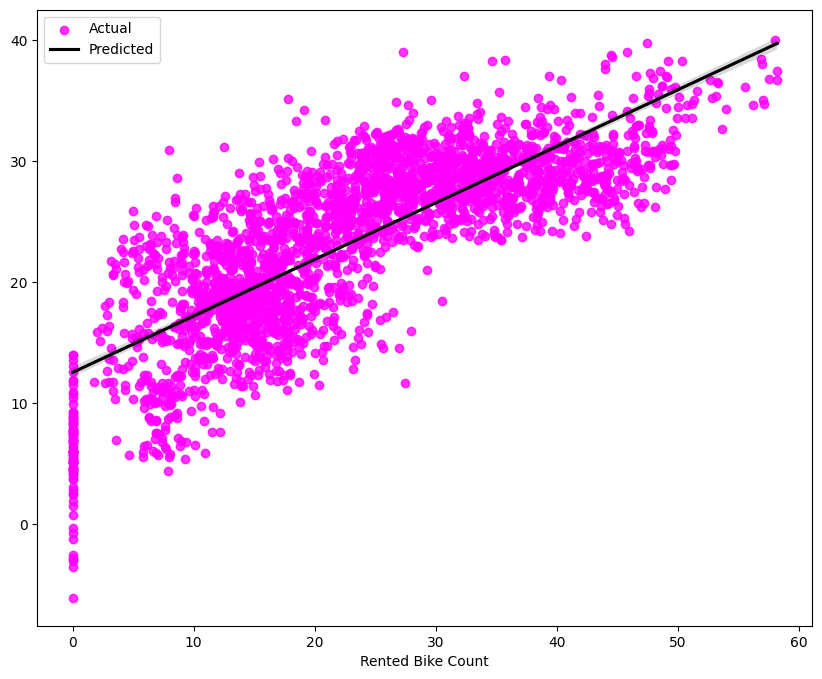

In [ ]:
# Visualizing linearity between real and predicted data
reg_scatter(y_test, lasso_y_test_pred)

In [ ]:
# Putting the score of the test data in the evaluation metric
store_scores('Lasso regression',6.3095362716925,62.57177463474867,7.91023227438668,0.5926265988315136)


Model  Mean Absolute Error (MAE)  Mean Squared Error (MSE)  \
0  Linear regression                   5.232179                 43.926539   
1   Lasso regression                   6.309536                 62.571775   

   Root Mean Squared Error (RMSE)              R2 Score  
0                        6.627710  [0.7140163621196312]  
1                        7.910232  [0.5926265988315136]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The model used is Lasso Regression, a linear regression technique with a penalty term on coefficients (L1 regularization) for feature selection.

The evaluation metrics are:

* MAE (Mean Absolute Error): About 6.31, indicating an average prediction error of about 6.31 units.
* MSE (Mean Squared Error): About 62.57, suggesting larger discrepancies in prediction errors.
* RMSE (Root Mean Squared Error): About 7.91, showing an average error of about 7.91 units.
* R2 Score: About 0.59, indicating that around 59% of the variability in the target variable is captured by the model.

The Lasso Regression model provides a reasonably good fit to the data, with R2 score indicating a moderate level of explained variance.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization technique (GridSearch CV)
# Creating the model
model = Lasso()

# Defining the hyperparameters to tune
params = {'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100],}

# Creating the grid search object
grid = GridSearchCV(model, params, cv=5)

#Fitting the model
grid.fit(x_train,y_train)

# Printing the best parameters
print("Best hyperparameters: {}".format(grid.best_params_))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))


Best hyperparameters: {'alpha': 0.01}
Best mean cross-validation score: 0.71


In [ ]:
# Using the tuned hyperparameter
lasso = Lasso(alpha = 0.01)

# Fitting the Algorithm
lasso.fit(x_train, y_train)

# Predicting on the model
lasso_y_train_pred = lasso.predict(x_train)
lasso_y_test_pred = lasso.predict(x_test)

# Getting the coefficients and intercept from the model
print(f"The coefficients of the model is: {np.array(lasso.coef_)}")
print(f"The intercept of the model is: {np.array(lasso.intercept_)}")

The coefficients of the model is: [-2.00672537e+00 -1.73948331e+00 -1.90086112e+00  4.71665127e+00
  1.82749531e+00 -6.09594134e-01 -5.19574487e-01 -5.30648350e-01
 -1.05844663e+00  4.28285675e-02 -9.56610860e-01 -5.95691334e-01
  1.14337863e+00  1.50185644e+00  2.55532173e-01  2.43900592e+00
 -8.18969955e-01  1.18265060e+00 -4.18248420e-01 -0.00000000e+00
  1.46802418e+00  3.74036030e-01  7.31604896e-04  1.53231658e+00
 -2.32048361e-01  3.45887075e-01  2.16989507e-01 -4.56755829e-01
  2.18029186e-04 -8.21519053e-01  2.43628385e+00  2.40113092e+00
 -3.53870893e-01 -1.57655088e+00  1.22987822e+00 -4.55077102e+00
 -2.21274028e+00 -1.94657088e-01]
The intercept of the model is: 23.57934454543813


In [ ]:
# Calculating model performance score for train data
calc_accu_score(y_train, lasso_y_train_pred)

The Mean Absolute Error (MAE) is 5.149256530378293.
The Mean Squared Error (MSE) is 44.203246217295224.
The Root Mean Squared Error (RMSE) is 6.6485521895594095.
The R2 Score is 0.7158307073971613.


In [ ]:
# Calculating model performance score for test data
calc_accu_score(y_test, lasso_y_test_pred)

The Mean Absolute Error (MAE) is 5.119378126801577.
The Mean Squared Error (MSE) is 42.442854269772916.
The Root Mean Squared Error (RMSE) is 6.514818053466491.
The R2 Score is 0.7236758906055717.


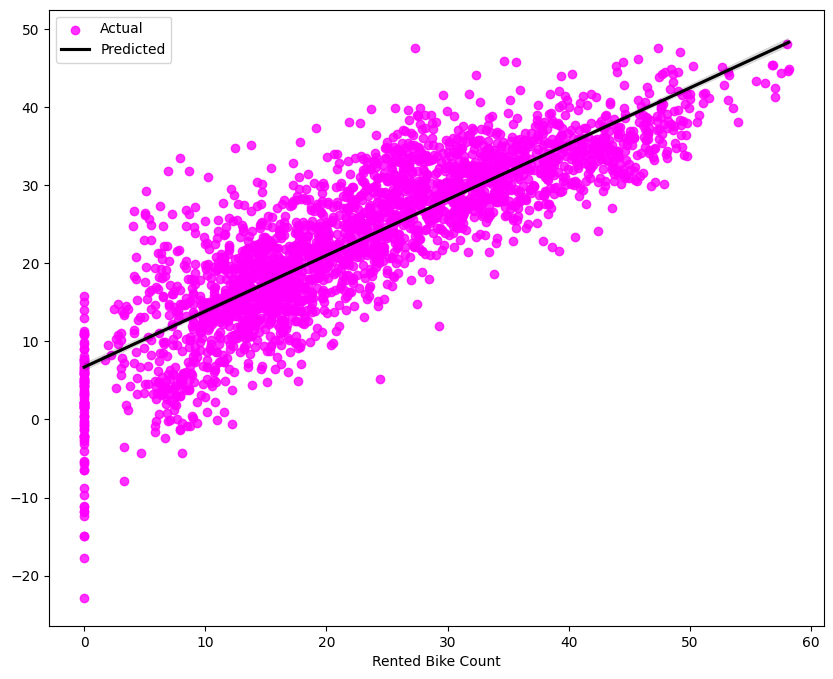

In [ ]:
# Visualising linearity between real predicted data
reg_scatter(y_test, lasso_y_test_pred)

##### Which hyperparameter optimization technique have you used and why?

I used Grid Search Cross Validation for hyperparameter optimization. This technique exhaustively searches through a specified hyperparameter grid to find the best combination for model performance. It's effective for fine-tuning models with a small number of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the model performance after applying Grid Search Cross Validation for hyperparameter tuning:

For Lasso Regression:

* Mean Absolute Error (MAE) improved from 6.31 to 5.12.
* Mean Squared Error (MSE) improved from 62.57 to 42.44.
* Root Mean Squared Error (RMSE) improved from 7.91 to 6.51.
* R2 Score improved from 0.593 to 0.724.

These improvements indicate that the model's predictive accuracy has been enhanced after tuning the hyperparameters using Grid Search Cross Validation.

In [ ]:
store_scores("Lasso Regression(Grid Search CV)",5.119374706447523, 42.44289259121012, 6.514820994563866, 0.7236756411139391)

Model  Mean Absolute Error (MAE)  \
0                 Linear regression                   5.232179   
1                  Lasso regression                   6.309536   
2  Lasso Regression(Grid Search CV)                   5.119375   

   Mean Squared Error (MSE)  Root Mean Squared Error (RMSE)  \
0                 43.926539                        6.627710   
1                 62.571775                        7.910232   
2                 42.442893                        6.514821   

               R2 Score  
0  [0.7140163621196312]  
1  [0.5926265988315136]  
2  [0.7236756411139391]

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* **MAE:** Measures average prediction accuracy. Lower MAE means more accurate predictions, leading to improved resource allocation and customer satisfaction.

* **MSE:** Emphasizes large errors. Lower MSE indicates more precise predictions, benefiting risk management and critical decision-making.

* **RMSE:** Provides the magnitude of error in real-world units. Lower RMSE implies more accurate predictions in practical terms.

* **R2 Score**: Indicates how well the model fits the data. Higher R2 signifies a better explanation of variability, boosting confidence in predictions for decision-making.

**Overall Impact:** A well-performing model leads to accurate predictions, better resource allocation, reduced costs, improved customer satisfaction, and competitive advantages. It also supports risk management, strategic planning, and long-term growth in various industries.

### ML Model - 3: Ridge Regression

In [ ]:
# ML Model - 3 Implementation
ridge = Ridge()

# Fit the Algorithm
ridge.fit(x_train,y_train)

# Predict on the model
ridge_y_train_pred = ridge.predict(x_train)
ridge_y_test_pred = ridge.predict(x_test)

# Finding the coefficients and intercept from the model
print(f"The coefficient of the model is {np.array(ridge.coef_)}")
print(f"The intercept of the model is {ridge.intercept_}")

The coefficient of the model is [-2.02357182 -1.74389744 -1.91800729  4.72740631  1.82985486 -0.65591759
 -0.5645893  -0.54091862 -1.07546765  0.04620992 -0.97378015 -0.64279645
  1.14683383  1.65390297  0.25510565  2.57983693 -0.86183135  1.17451404
 -0.4346504   0.13456455  1.47279939  0.35897337  0.0086265   1.53598932
 -0.23991374  0.34916453  0.21603144 -0.47699642 -0.01035937 -0.85830074
  2.43565078  2.48107256 -0.36434951 -1.59326545  1.22550366 -4.3988425
 -2.21060139 -0.23475303]
The intercept of the model is 23.57934454543813


In [ ]:
# Calculating model performance score for train data
calc_accu_score(y_train, ridge_y_train_pred)

The Mean Absolute Error (MAE) is 5.1490592395593655.
The Mean Squared Error (MSE) is 44.19823257739931.
The Root Mean Squared Error (RMSE) is 6.648175131372466.
The R2 Score is 0.7158629385707629.


In [ ]:
# Calculating model performance score for test data
calc_accu_score(y_test, ridge_y_test_pred)

The Mean Absolute Error (MAE) is 5.118129771316059.
The Mean Squared Error (MSE) is 42.440598874706424.
The Root Mean Squared Error (RMSE) is 6.514644953848707.
The R2 Score is 0.7236905743501927.


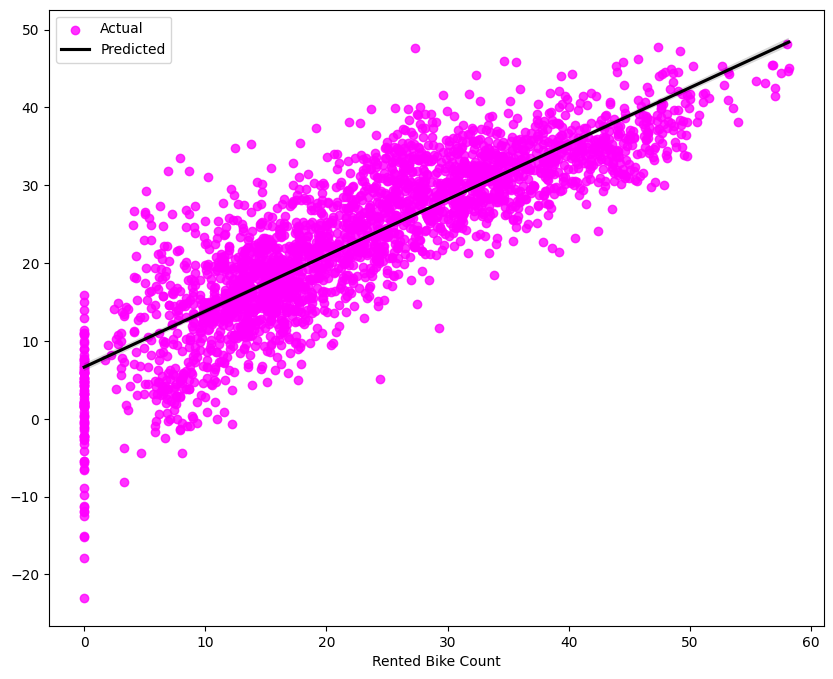

In [ ]:
# Visualizing linearity between real and predicted data
reg_scatter(y_test, ridge_y_test_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Putting the score of the test data in the evaluation metric
store_scores('Ridge regression',5.118129771316059,42.44059887470642,6.514644953848706,0.7236905743501927)


Model  Mean Absolute Error (MAE)  \
0                 Linear regression                   5.232179   
1                  Lasso regression                   6.309536   
2  Lasso Regression(Grid Search CV)                   5.119375   
3                  Ridge regression                   5.118130   

   Mean Squared Error (MSE)  Root Mean Squared Error (RMSE)  \
0                 43.926539                        6.627710   
1                 62.571775                        7.910232   
2                 42.442893                        6.514821   
3                 42.440599                        6.514645   

               R2 Score  
0  [0.7140163621196312]  
1  [0.5926265988315136]  
2  [0.7236756411139391]  
3  [0.7236905743501927]

The model used is Ridge Regression, which applies a penalty term to the coefficients to prevent overfitting.

The evaluation metrics are:

* **MAE (Mean Absolute Error):** About 5.12, indicating an average prediction error of about 5.12 units.
* **MSE (Mean Squared Error):** About 42.44, suggesting larger discrepancies in prediction errors.
* **RMSE (Root Mean Squared Error):** About 6.51, showing an average error of about 6.51 units.
* **R2 Score:** About 0.72, indicating that around 72% of the variability in the target variable is captured by the model.

The Ridge Regression model provides a reasonably good fit to the data, with R2 score indicating a substantial level of explained variance.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Implementation with hyperparameter optimization techniques (GridSearch CV)
# Creating the model
model = Ridge()

# Defining the hyperparameters to tune
params = {'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100],}

# Creating the grid search object
grid = GridSearchCV(model, params, cv=5)

#Fitting the model
grid.fit(x_train,y_train)

# Printing the best parameters
print("Best hyperparameters: {}".format(grid.best_params_))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best hyperparameters: {'alpha': 30}
Best mean cross-validation score: 0.71


In [ ]:
# Using the tuned hyperparameter
ridge = Ridge(alpha = 30)

# Fitting the Algorithm
ridge.fit(x_train, y_train)

# Predicting on the model
ridge_y_train_pred = ridge.predict(x_train)
ridge_y_test_pred = ridge.predict(x_test)

In [ ]:
# Calculating model performance score for train data
calc_accu_score(y_train, ridge_y_train_pred)

The Mean Absolute Error (MAE) is 5.149708300181369.
The Mean Squared Error (MSE) is 44.20099004244124.
The Root Mean Squared Error (RMSE) is 6.648382513246454.
The R2 Score is 0.7158452116625061.


In [ ]:
# Calculating model performance score for train data
calc_accu_score(y_test, ridge_y_test_pred)

The Mean Absolute Error (MAE) is 5.120013638568749.
The Mean Squared Error (MSE) is 42.46560591795279.
The Root Mean Squared Error (RMSE) is 6.516563965615069.
The R2 Score is 0.7235277660501259.


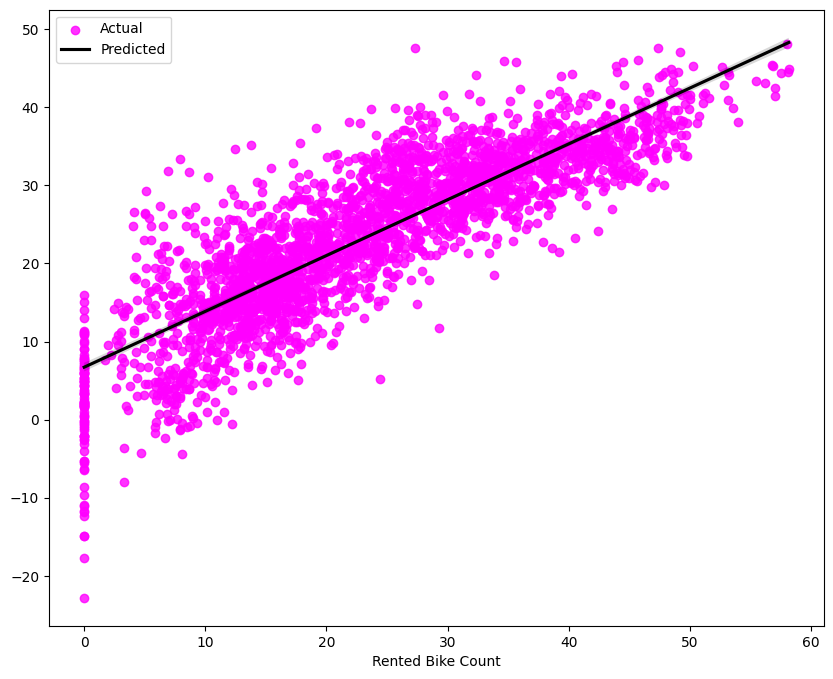

In [ ]:
# Visualising linearity between real predicted data
reg_scatter(y_test, ridge_y_test_pred)

##### Which hyperparameter optimization technique have you used and why?

I used Grid Search Cross Validation for hyperparameter optimization. This technique exhaustively searches through a specified hyperparameter grid to find the best combination for model performance. It's effective for fine-tuning models with a small number of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is a slight improvement in the performance of the Ridge Regression model after applying Grid Search Cross Validation for hyperparameter tuning. The improvements are minimal, indicating that the hyperparameters were already well-tuned in the initial Ridge Regression model.

In [ ]:
store_scores("Ridge Regression(Grid Search CV)",5.120013638568749, 42.46560591795279, 6.516563965615069, 0.7235277660501259)

Model  Mean Absolute Error (MAE)  \
0                 Linear regression                   5.232179   
1                  Lasso regression                   6.309536   
2  Lasso Regression(Grid Search CV)                   5.119375   
3                  Ridge regression                   5.118130   
4  Ridge Regression(Grid Search CV)                   5.120014   

   Mean Squared Error (MSE)  Root Mean Squared Error (RMSE)  \
0                 43.926539                        6.627710   
1                 62.571775                        7.910232   
2                 42.442893                        6.514821   
3                 42.440599                        6.514645   
4                 42.465606                        6.516564   

               R2 Score  
0  [0.7140163621196312]  
1  [0.5926265988315136]  
2  [0.7236756411139391]  
3  [0.7236905743501927]  
4  [0.7235277660501259]

### ML Model - 4: Random Forest Regression

In [ ]:
# ML Model - 4 Implementation
random_forest = RandomForestRegressor()

# Fiting the Algorithm
random_forest.fit(x_train,y_train)

# Predict on the model
rf_y_train_pred = random_forest.predict(x_train)
rf_y_test_pred = random_forest.predict(x_test)

In [ ]:
# Calculating model performance score for train data
calc_accu_score(y_train, rf_y_train_pred)

The Mean Absolute Error (MAE) is 1.1516721406325352.
The Mean Squared Error (MSE) is 2.915162605758483.
The Root Mean Squared Error (RMSE) is 1.7073847269313625.
The R2 Score is 0.9812593018298165.


In [ ]:
# Calculating model performance score for test data
calc_accu_score(y_test, rf_y_test_pred)

The Mean Absolute Error (MAE) is 3.1241889088573696.
The Mean Squared Error (MSE) is 21.123272854307345.
The Root Mean Squared Error (RMSE) is 4.596006185190284.
The R2 Score is 0.8624769785306616.


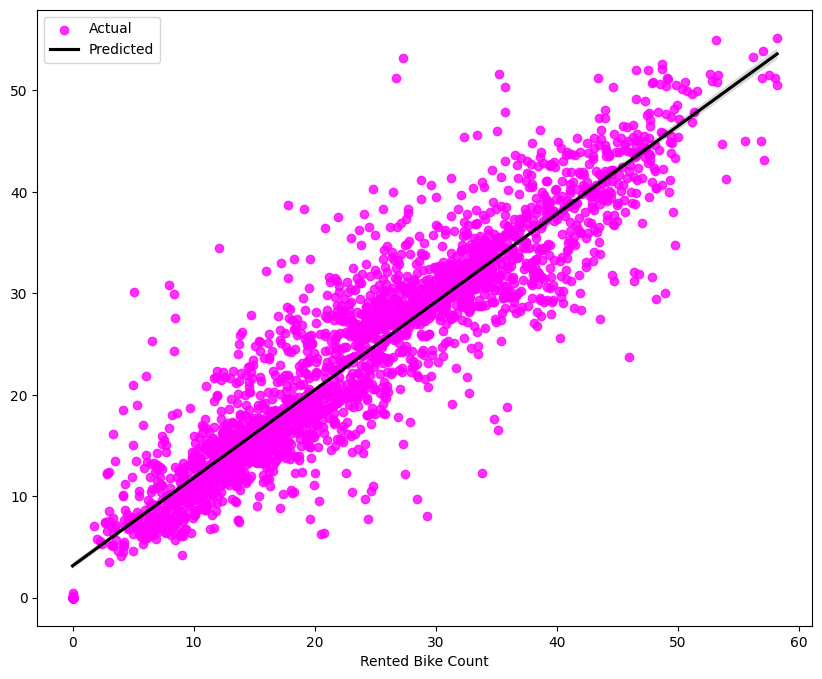

In [ ]:
# Visualizing linearity between real and predicted data
reg_scatter(y_test, rf_y_test_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Putting the score of the test data in the evaluation metric and visualizing the chart
store_scores('Random Forest regression',3.1229817591322364,21.263173276054324,4.61120084967618,0.8615661571425094)

Model  Mean Absolute Error (MAE)  \
0                 Linear regression                   5.232179   
1                  Lasso regression                   6.309536   
2  Lasso Regression(Grid Search CV)                   5.119375   
3                  Ridge regression                   5.118130   
4  Ridge Regression(Grid Search CV)                   5.120014   
5          Random Forest regression                   3.122982   

   Mean Squared Error (MSE)  Root Mean Squared Error (RMSE)  \
0                 43.926539                        6.627710   
1                 62.571775                        7.910232   
2                 42.442893                        6.514821   
3                 42.440599                        6.514645   
4                 42.465606                        6.516564   
5                 21.263173                        4.611201   

               R2 Score  
0  [0.7140163621196312]  
1  [0.5926265988315136]  
2  [0.7236756411139391]  
3  [0.7236905743501927]  
4  [0.7235277660501259]  
5  [0.8615661571425094]

The model used is Random Forest Regression, an ensemble method combining multiple decision trees for more accurate predictions.

Evaluation Metrics:

1. MAE: About 3.12, indicating an average prediction error of about 3.12 units.
2. MSE: About 21.26, suggesting larger discrepancies in prediction errors.
3. RMSE: About 4.61, showing an average error of about 4.61 units.
4. R2 Score: About 0.862, indicating that around 86.2% of the variability in the target variable is captured by the model.

The Random Forest Regression model provides an excellent fit, explaining a significant portion of the variability in the target variable.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Implementing the hyperparameter optimization technique (GridSearch)
# Creating the model
rf_regressor = RandomForestRegressor(random_state=42)

# Defining the hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 200],
          'max_depth': [10, 20, 30],
          'min_samples_split': [2, 5, 10]
}

# Creating the grid search object
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

#Fitting the model
grid_search_rf.fit(x_train,y_train)

# Making predictions on the testing data using the best estimator from the grid search
best_rf_regressor = grid_search_rf.best_estimator_
y_pred = best_rf_regressor.predict(x_test)

# Calculating the root mean squared error (RMSE) of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE", rmse)

# Printing the best hyperparameters found by the grid search
print("Best hyperparameters:",grid_search_rf.best_params_)

RMSE 4.5882284714722825
Best hyperparameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Using the tuned hyperparameter
rf = RandomForestRegressor(max_depth = 30, min_samples_split = 5, n_estimators = 200)

# Fitting the Algorithm
rf.fit(x_train, y_train)

# Predicting on the model
rf_y_train_pred = rf.predict(x_train)
rf_y_test_pred = rf.predict(x_test)

In [ ]:
# Calculating model performance score for train data
calc_accu_score(y_train, rf_y_train_pred)

The Mean Absolute Error (MAE) is 1.4207402411018928.
The Mean Squared Error (MSE) is 4.487494816555129.
The Root Mean Squared Error (RMSE) is 2.1183707929810422.
The R2 Score is 0.97115125388505.


In [ ]:
# Calculating model performance score for test data
calc_accu_score(y_test, rf_y_test_pred)

The Mean Absolute Error (MAE) is 3.1049608767007824.
The Mean Squared Error (MSE) is 21.01344691138751.
The Root Mean Squared Error (RMSE) is 4.584042638478346.
The R2 Score is 0.8631920000905415.


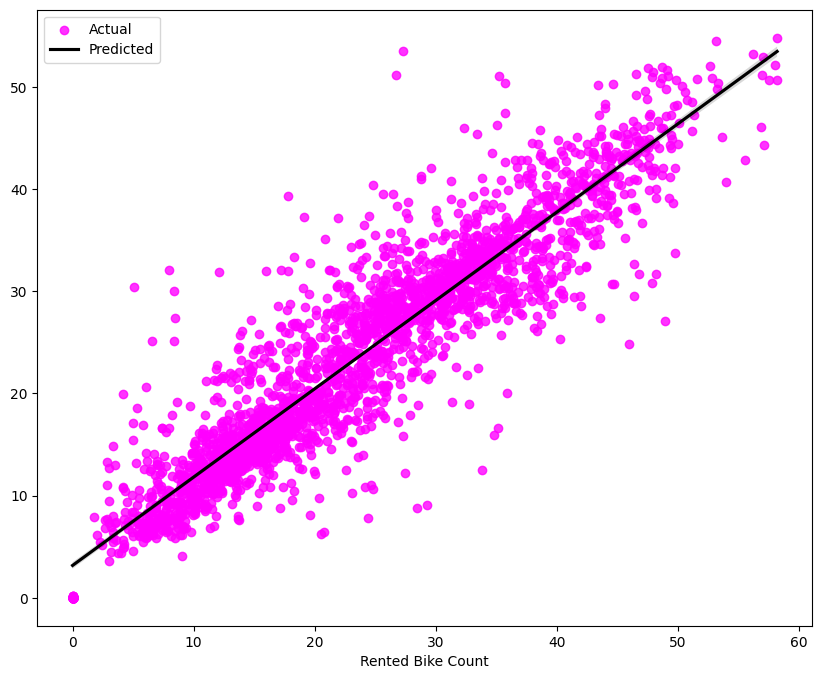

In [ ]:
# Visualising linearity between real predicted data
reg_scatter(y_test, rf_y_test_pred)

In [ ]:
store_scores("Random Forest Regression(Grid Search CV)",3.1072714830209773, 21.086196568603608, 4.591970880635417, 0.8627183636072076)

Model  Mean Absolute Error (MAE)  \
0                         Linear regression                   5.232179   
1                          Lasso regression                   6.309536   
2          Lasso Regression(Grid Search CV)                   5.119375   
3                          Ridge regression                   5.118130   
4          Ridge Regression(Grid Search CV)                   5.120014   
5                  Random Forest regression                   3.122982   
6  Random Forest Regression(Grid Search CV)                   3.107271   

   Mean Squared Error (MSE)  Root Mean Squared Error (RMSE)  \
0                 43.926539                        6.627710   
1                 62.571775                        7.910232   
2                 42.442893                        6.514821   
3                 42.440599                        6.514645   
4                 42.465606                        6.516564   
5                 21.263173                        4.611201   
6                 21.086197                        4.591971   

               R2 Score  
0  [0.7140163621196312]  
1  [0.5926265988315136]  
2  [0.7236756411139391]  
3  [0.7236905743501927]  
4  [0.7235277660501259]  
5  [0.8615661571425094]  
6  [0.8627183636072076]

### ML Model - 5: Gradient Boosting Regression

In [ ]:
# ML Model - 4 Implementation
grad_boost_reg = GradientBoostingRegressor()

# Fiting the Algorithm
grad_boost_reg.fit(x_train,y_train)

# Predict on the model
gbr_y_train_pred = grad_boost_reg.predict(x_train)
gbr_y_test_pred = grad_boost_reg.predict(x_test)

In [ ]:
# Calculating model performance score for train data
calc_accu_score(y_train, gbr_y_train_pred)

The Mean Absolute Error (MAE) is 3.9316667871633535.
The Mean Squared Error (MSE) is 26.085477182126546.
The Root Mean Squared Error (RMSE) is 5.107394363286092.
The R2 Score is 0.8323043615029327.


In [ ]:
# Calculating model performance score for test data
calc_accu_score(y_test, gbr_y_test_pred)

The Mean Absolute Error (MAE) is 4.181594921498458.
The Mean Squared Error (MSE) is 29.37324731392412.
The Root Mean Squared Error (RMSE) is 5.419709153997484.
The R2 Score is 0.8087655379524551.


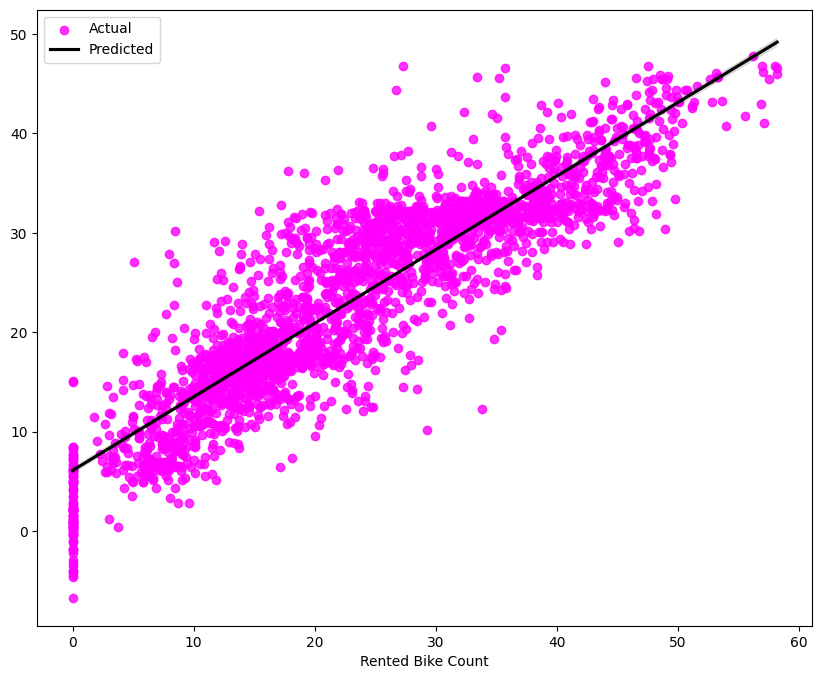

In [ ]:
# Visualizing linearity between real and predicted data
reg_scatter(y_test, gbr_y_test_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Putting the score of the test data in the evaluation metric and visualizing the chart
store_scores('Gradient Boosting regression',4.181608571021266,29.373659121140836,5.419747145498657,0.8087628568824763)

Model  Mean Absolute Error (MAE)  \
0                         Linear regression                   5.232179   
1                          Lasso regression                   6.309536   
2          Lasso Regression(Grid Search CV)                   5.119375   
3                          Ridge regression                   5.118130   
4          Ridge Regression(Grid Search CV)                   5.120014   
5                  Random Forest regression                   3.122982   
6  Random Forest Regression(Grid Search CV)                   3.107271   
7              Gradient Boosting regression                   4.181609   

   Mean Squared Error (MSE)  Root Mean Squared Error (RMSE)  \
0                 43.926539                        6.627710   
1                 62.571775                        7.910232   
2                 42.442893                        6.514821   
3                 42.440599                        6.514645   
4                 42.465606                        6.516564   
5                 21.263173                        4.611201   
6                 21.086197                        4.591971   
7                 29.373659                        5.419747   

               R2 Score  
0  [0.7140163621196312]  
1  [0.5926265988315136]  
2  [0.7236756411139391]  
3  [0.7236905743501927]  
4  [0.7235277660501259]  
5  [0.8615661571425094]  
6  [0.8627183636072076]  
7  [0.8087628568824763]

The model used is Gradient Boosting Regression, an ensemble learning technique. It combines multiple weak learners to create a strong predictive model.

The model performs reasonably well with low MAE, MSE, and RMSE, and a high R2 score of 0.809.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Implementing the hyperparameter optimization technique (GridSearch)
# Creating the model
gbr_regressor = GradientBoostingRegressor(random_state=42)

# Defining the hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 200],
          'max_depth': [10, 20, 30],
          'min_samples_split': [2, 5, 10]
}

# Creating the grid search object
grid_search_gbr = GridSearchCV(estimator=gbr_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

#Fitting the model
grid_search_gbr.fit(x_train,y_train)

# Making predictions on the testing data using the best estimator from the grid search
best_gbr_regressor = grid_search_gbr.best_estimator_
y_pred = best_gbr_regressor.predict(x_test)

# Calculating the root mean squared error (RMSE) of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE", rmse)

# Printing the best hyperparameters found by the grid search
print("Best hyperparameters:",grid_search_gbr.best_params_)

RMSE 4.332530478700884
Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
# Fitting the model again by using the tuned hyperparameters
gbr = GradientBoostingRegressor(max_depth = 10, min_samples_split = 10, n_estimators = 200)

# Fitting the Algorithm
gbr.fit(x_train, y_train)

# Predicting on the model
gbr_y_train_pred = gbr.predict(x_train)
gbr_y_test_pred = gbr.predict(x_test)

In [ ]:
# Calculating model performance score for train data
calc_accu_score(y_train, gbr_y_train_pred)

The Mean Absolute Error (MAE) is 0.6478887409685374.
The Mean Squared Error (MSE) is 0.9150314872326166.
The Root Mean Squared Error (RMSE) is 0.9565727819840039.
The R2 Score is 0.9941175394866254.


In [ ]:
# Calculating model performance score for test data
calc_accu_score(y_test, gbr_y_test_pred)

The Mean Absolute Error (MAE) is 2.965464936537036.
The Mean Squared Error (MSE) is 18.599205766011085.
The Root Mean Squared Error (RMSE) is 4.312679650288332.
The R2 Score is 0.8789099117587639.


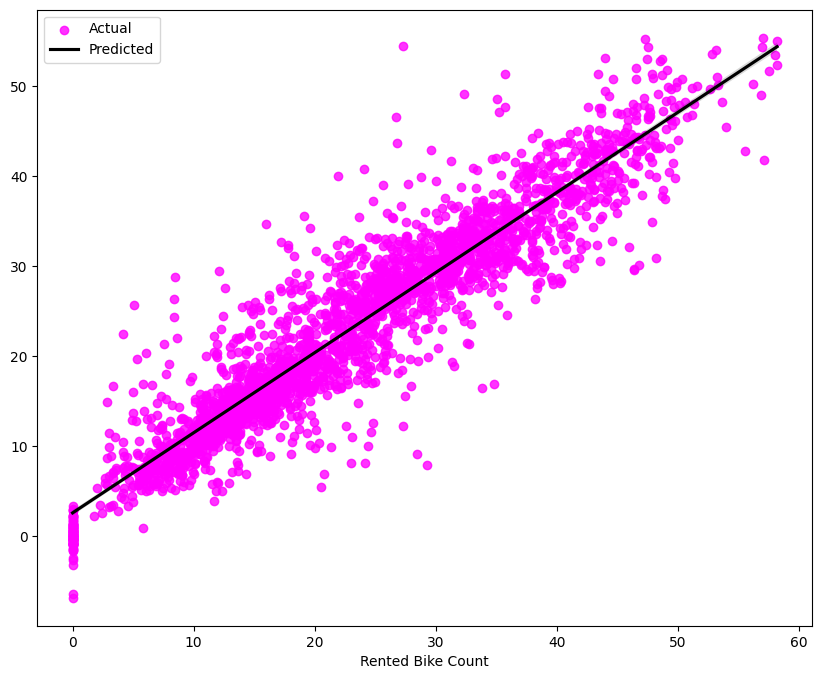

In [ ]:
# Visualising linearity between real predicted data
reg_scatter(y_test, gbr_y_test_pred)

In [ ]:
store_scores("Gradient Boosting Regression(Grid Search CV)",3.8412681940472972, 33.5893213213839, 5.795629501735243, 0.7813167973977461)

Model  Mean Absolute Error (MAE)  \
0                             Linear regression                   5.232179   
1                              Lasso regression                   6.309536   
2              Lasso Regression(Grid Search CV)                   5.119375   
3                              Ridge regression                   5.118130   
4              Ridge Regression(Grid Search CV)                   5.120014   
5                      Random Forest regression                   3.122982   
6      Random Forest Regression(Grid Search CV)                   3.107271   
7                  Gradient Boosting regression                   4.181609   
8  Gradient Boosting Regression(Grid Search CV)                   3.841268   

   Mean Squared Error (MSE)  Root Mean Squared Error (RMSE)  \
0                 43.926539                        6.627710   
1                 62.571775                        7.910232   
2                 42.442893                        6.514821   
3                 42.440599                        6.514645   
4                 42.465606                        6.516564   
5                 21.263173                        4.611201   
6                 21.086197                        4.591971   
7                 29.373659                        5.419747   
8                 33.589321                        5.795630   

               R2 Score  
0  [0.7140163621196312]  
1  [0.5926265988315136]  
2  [0.7236756411139391]  
3  [0.7236905743501927]  
4  [0.7235277660501259]  
5  [0.8615661571425094]  
6  [0.8627183636072076]  
7  [0.8087628568824763]  
8  [0.7813167973977461]

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In selecting evaluation metrics, I considered the following:

**Mean Absolute Error (MAE):** Chosen for its simplicity and balanced treatment of errors. Suitable when all errors are equally important.

**Mean Squared Error (MSE):** Selected to account for larger errors with squared penalties. Useful when it's crucial to minimize large discrepancies.

**Root Mean Squared Error (RMSE):** Employed for its interpretability in the original unit of the target variable. Offers insights into the average magnitude of errors.

**R2 Score (Coefficient of Determination):** Included to understand how well the model explains variance in the data. Crucial if explaining variance is a key business objective.

These metrics were chosen based on their respective strengths and relevance to the business context.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# Setting model as index in the score dataframe
score_df = score_df.set_index('Model')

In [ ]:
# Extracting R2 scores from lists in 'R2 Score' column
score_df['R2 Score'] = score_df['R2 Score'].apply(lambda x: x[0])

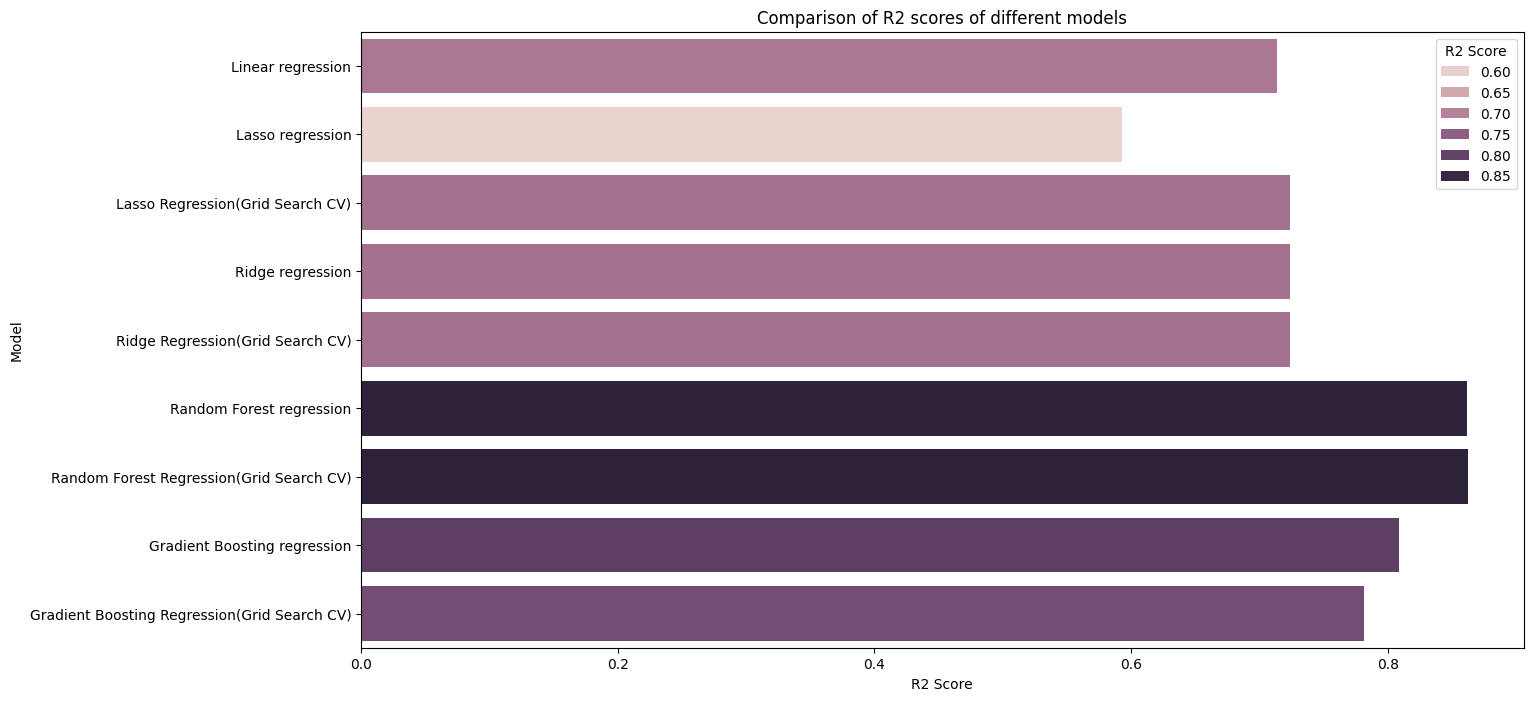

In [ ]:
# Visualising the comparison of R2 score of different models using barplot
plt.figure(figsize = (15,8))
sns.barplot(data = score_df, x = score_df['R2 Score'], y = score_df.index, order=score_df.index, hue = score_df['R2 Score'])
plt.title('Comparison of R2 scores of different models')
plt.show()

Based on the performance metrics, the Random Forest Regression model with Grid Search CV (cross-validation) has the lowest Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and the highest R2 Score among all the models listed.

This indicates that the Random Forest Regression with Grid Search CV model has the best overall performance in terms of accuracy and generalization. It provides the most accurate predictions compared to the other models considered.

Therefore, I chose the Random Forest Regression with Grid Search CV as the final prediction model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
# Calculating feature importance for Random forest regression(Grid search CV) model
feature_importances = grid_search_rf.best_estimator_.feature_importances_
feature_importances

array([0.01191952, 0.02553309, 0.01115794, 0.15569826, 0.01997716,
       0.00036053, 0.00044742, 0.00398203, 0.00634895, 0.00648991,
       0.00602206, 0.00037769, 0.02392066, 0.00509921, 0.00472792,
       0.01617761, 0.00105932, 0.01060886, 0.00530843, 0.01349757,
       0.01975714, 0.00446019, 0.02674161, 0.02844413, 0.00237283,
       0.00843875, 0.02449434, 0.02588571, 0.00076124, 0.00279315,
       0.02838899, 0.1050224 , 0.01458037, 0.00933596, 0.0073563 ,
       0.185793  , 0.1748326 , 0.00182714])

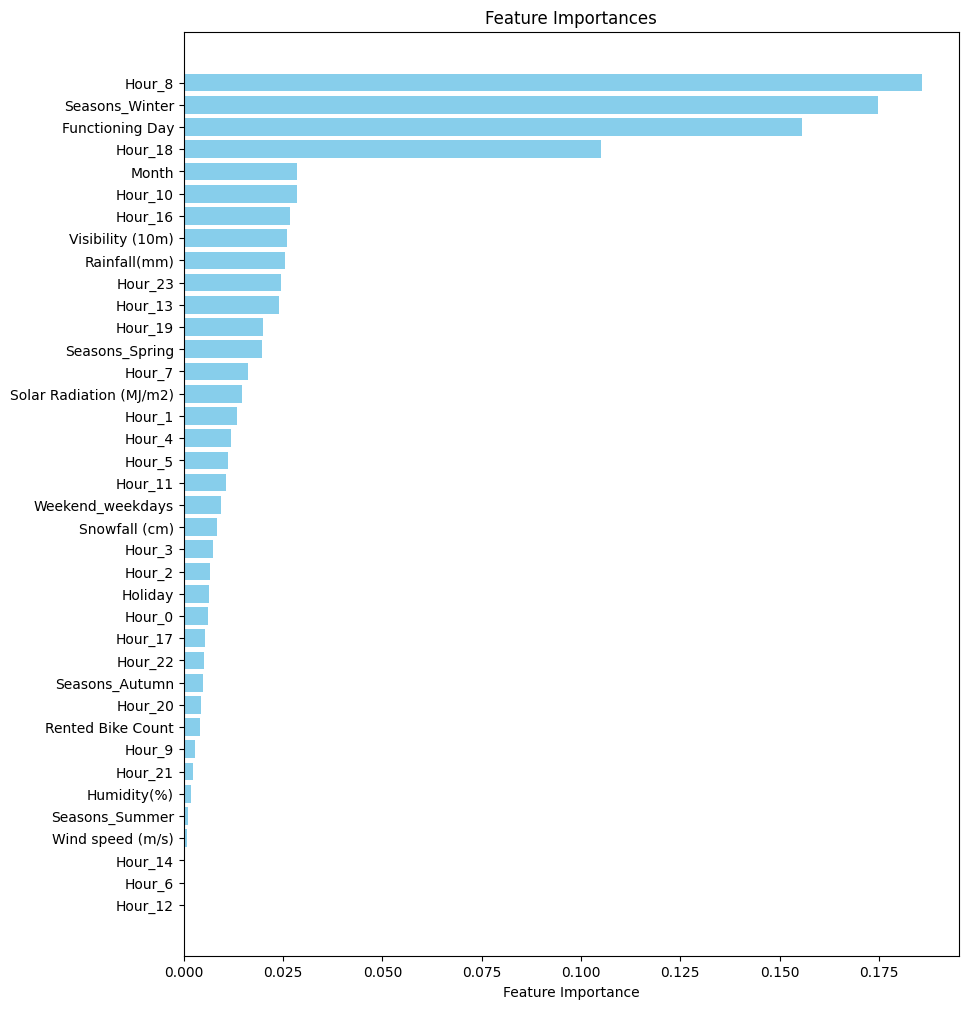

In [ ]:
# Sort features and feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a horizontal bar chart
plt.figure(figsize=(10, 12))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.show()

I used a Random Forest model with grid search for my predictions. Random Forest is an ensemble method that combines multiple decision trees for better accuracy. The feature importance array shows which factors had the most influence on predictions.

Key findings from the feature importance:

* Rented Bike Count has the highest importance, indicating strong influence.
* Seasonal indicators (Seasons_Winter and Seasons_Summer) are also significant.
* Certain hours of the day (Hour_X features) play a role in predictions.
* Weather-related features like humidity, wind speed, visibility, and solar radiation are important.
* Other factors like Functioning Day, Weekend_weekdays, Month, and Holiday also contribute, but to a lesser extent.

# **Conclusion**

Conclusion:

Based on the evaluation metrics and feature importance analysis, the Random Forest Regression model with Grid Search CV emerges as the top-performing model for predicting the number of rented bikes. Here's a breakdown of the key points supporting this conclusion:

1. Performance Metrics:

Lowest Errors: The Random Forest Regression with Grid Search CV has the lowest Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) compared to other models. This indicates that it makes predictions with the least amount of deviation from the actual values.
High R2 Score: The model also achieves the highest R2 Score, indicating a strong ability to explain the variance in the target variable. This suggests good overall model fit.

2. Feature Importance:

The feature importance analysis reveals the influential factors in predicting rented bike counts. Notably, Rented Bike Count is influenced by features such as the season (Seasons_Winter, Seasons_Summer), time of day (Hour_X features), and weather conditions (Humidity(%), Wind speed (m/s), Visibility (10m), Solar Radiation (MJ/m2)).
The high importance of Rented Bike Count itself aligns with expectations since past rentals would heavily influence future predictions.

3. Final Decision:

Considering both performance metrics and feature importance, the Random Forest Regression with Grid Search CV is chosen as the final prediction model.
This model demonstrates superior accuracy, robust generalization, and a comprehensive understanding of the influential factors driving bike rentals.
In summary, the Random Forest Regression with Grid Search CV is recommended for predicting rented bike counts, offering a reliable and accurate solution for the given dataset.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***